## Fetching Data from MySQL

In [2]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt

# Replace these variables with your database credentials
username = 'scott'
password = 'tiger'
host = 'localhost'  # or your database host
port = '3306'       # default MySQL port
database = 'ai_proj'

# Create a connection string
connection_string = f"mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}"
engine = create_engine(connection_string)

In [169]:
query = "select * from ics_asset_wavedata where asset_id = '55285839-9b78-48d8-9f4e-573190ace016'"
query_sigdata = "select * from ics_asset_sigdata where asset_id = '55285839-9b78-48d8-9f4e-573190ace016'"
query_status_hist = "select * from ics_asset_status_hist where asset_id = '55285839-9b78-48d8-9f4e-573190ace016'"
query_status = "select * from ics_asset_status where asset_id = '55285839-9b78-48d8-9f4e-573190ace016'"


In [170]:
# df = pd.DataFrame()
# df_sig = pd.DataFrame()
# df_status_hist = pd.DataFrame()
# df_status = pd.DataFrame()

In [171]:
df = pd.read_sql_query(query, engine)

In [172]:
df.to_csv('wave_5528', index= False )

In [173]:
df_sig = pd.read_sql_query(query_sigdata, engine) 
df_sig.to_csv('sig_5528', index = False)

In [174]:
df_status_hist = pd.read_sql_query(query_status_hist, engine) 
df_status_hist.to_csv('status_hist_5528', index = False)

df_status = pd.read_sql_query(query_status, engine) 
df_status.to_csv('status_5528', index = False)



In [175]:
df_status_hist.info()
df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   asset_id             238 non-null    object        
 1   time                 238 non-null    datetime64[ns]
 2   imbalance_health     210 non-null    float64       
 3   misalignment_health  210 non-null    float64       
 4   looseness_health     210 non-null    float64       
 5   bearing_health       210 non-null    float64       
 6   asset_health         219 non-null    float64       
 7   CRT_DT               238 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(5), object(1)
memory usage: 15.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   asset_id             1 non-null    

## Concatenating Tables

In [176]:
df_status_hist = df_status_hist.drop(columns= ['CRT_DT'])

In [177]:
df_status = pd.concat([df_status_hist, df_status], ignore_index=True)

In [178]:
df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   asset_id             239 non-null    object        
 1   time                 239 non-null    datetime64[ns]
 2   imbalance_health     211 non-null    float64       
 3   misalignment_health  211 non-null    float64       
 4   looseness_health     211 non-null    float64       
 5   bearing_health       211 non-null    float64       
 6   asset_health         220 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 13.2+ KB


## Don't Use XXXXXXXXXXX WaveData(Spectrum) 

In [3]:
df = pd.read_csv('wave_5528') 

In [17]:
x_amp = df['spectrum_x_amp'][0]
x_freq = df['spectrum_x_freq'][0]
type(x_amp) 

str

In [18]:
x_amp = [x_amp.replace("'", "")]

In [6]:
type(x_amp[0])

str

In [7]:
x_freq

'0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,5.46875,6.25,7.03125,7.8125,8.59375,9.375,10.15625,10.9375,11.71875,12.5,13.28125,14.0625,14.84375,15.625,16.40625,17.1875,17.96875,18.75,19.53125,20.3125,21.09375,21.875,22.65625,23.4375,24.21875,25,25.78125,26.5625,27.34375,28.125,28.90625,29.6875,30.46875,31.25,32.03125,32.8125,33.59375,34.375,35.15625,35.9375,36.71875,37.5,38.28125,39.0625,39.84375,40.625,41.40625,42.1875,42.96875,43.75,44.53125,45.3125,46.09375,46.875,47.65625,48.4375,49.21875,50,50.78125,51.5625,52.34375,53.125,53.90625,54.6875,55.46875,56.25,57.03125,57.8125,58.59375,59.375,60.15625,60.9375,61.71875,62.5,63.28125,64.0625,64.84375,65.625,66.40625,67.1875,67.96875,68.75,69.53125,70.3125,71.09375,71.875,72.65625,73.4375,74.21875,75,75.78125,76.5625,77.34375,78.125,78.90625,79.6875,80.46875,81.25,82.03125,82.8125,83.59375,84.375,85.15625,85.9375,86.71875,87.5,88.28125,89.0625,89.84375,90.625,91.40625,92.1875,92.96875,93.75,94.53125,95.3125,96.09375,96.875,97.65625,98.43

In [8]:
# type(df_status)

### Just copying from MySQL

In [83]:
# created_at 1704815264 (normal)
x_Yaxis_1704815264 = [0.00003949504670519601,0.0000852975324706669,0.0001600229646119745,0.00027100999270797665,0.00025850475438010217,0.00024936502665365024,0.00017003881523346823,0.00021309233006929464,0.00021729449203189606,0.00025961190286017647,0.00032486157540802864,0.00012962227963253945,0.00013730006144318374,0.00015622479490979446,0.00007568298540410934,0.00014223084125036315,0.00009317786632760249,0.00007819149879827242,0.0001616591518351474,0.00025078627207035493,0.00027303808985567354,0.00013758929095118033,0.00007405498219288206,0.00019873562552605718,0.0002605349428099062,0.00008229203791544382,0.00013268725199747599,0.00022020376461247049,0.0003165408212789674,0.00037961609285308594,0.00034503923593090383,0.00019741725658509708,0.00007316488036252875,0.00011415451696164186,0.0002245869672307213,0.0002513586844910795,0.0003054059458362441,0.00031132849268425444,0.00023378606600082816,0.00020501046653363257,0.0001324789887117265,0.00012933660290120598,0.0003005956419730105,0.0005026760930753422,0.00041182398402269185,0.0003896891989943209,0.0003263736415424091,0.00039424525766713594,0.00027359457943621537,0.00007246655940567084,0.00006439721349430324,0.00016899419213987687,0.00010575214223755577,0.00017922833228961783,0.0001237049337485719,0.0005017761359079686,0.0005895998169728508,0.0004523694701420694,0.00034629840243644814,0.00030566772604869927,0.000278138233684317,0.0002594282186986808,0.0003225034288958092,0.00024223010524374058,0.00010300494463029047,0.00023206891977834497,0.0001237534005933999,0.00017245161979370934,0.0003690778962913376,0.0004150590959901723,0.00032273958253642063,0.00027582196164295357,0.00036411877926522274,0.00032319897232292277,0.00019917543666703852,0.00026257122466143845,0.0002906184122937337,0.0004798220306568375,0.0005582439608725843,0.0003370154499791925,0.00021495393956035916,0.00048598691875300124,0.000542901626292716,0.0004124985586777882,0.00042366440184351227,0.00030318280168593057,0.00019985396049871035,0.00038242170145064684,0.00033583108458793754,0.0003195676270910099,0.0003742598804143246,0.0004336333249766148,0.00032182105864218293,0.000041334619319390274,0.00013265330270089678,0.0001242366091472388,0.0002577575635290202,0.000060923413072688426,0.000414991350311382,0.0005958865891253353,0.0004954291785292053,0.00043050123707875487,0.00044677690220356844,0.0004497356809178283,0.00044740257508428294,0.000324820063045166,0.00020596570360742204,0.0004080224597728388,0.0004051180621146701,0.00018577472804673438,0.00006998640340090693,0.00019148040669811117,0.0004006349501570398,0.0005042629115740852,0.00038916322336373364,0.0002782802881353787,0.0003317928987775549,0.00023806625497853784,0.00019070139269158486,0.0003173431216689187,0.00042310299283058545,0.0003939192622391758,0.00040564430035319135,0.00028324269918363114,0.00012483546691073984,0.00034972050156917143,0.0003544304319311618,0.00019956819780921718,0.000155090287405987,0.00040710415377083015,0.0003917702212547889,0.00021190836845648008,0.0001290052998825357,0.00031746628629572153,0.00021774952393383278,0.00025283927368086165,0.00028149659227333016,0.00018144979271640253,0.00019071475256606418,0.00023056832150632163,0.00017089417287915058,0.00015387919004762233,0.0003420144686874826,0.00046081831923216126,0.00043074113244846485,0.0002671614425200953,0.0004437609262877869,0.0006553311637479576,0.0006521308854541765,0.00042616029346984795,0.00012072502366475758,0.00020167881745170168,0.0002828394886858514,0.00016626885798047902,0.00019514500625240593,0.00034630992027957915,0.00030461379407449845,0.00014758973779000213,0.00014667283991356907,0.00023271769066721088,0.0002608359634804319,0.00023203253704586092,0.0003510957932421098,0.0003068389217246085,0.00009637893054204723,0.00014707185838141112,0.00034445068821262073,0.00030994712882924835,0.0001441123383725316,0.00021079023558059315,0.00015307098139584474,0.00009915282747909882,0.00016325162239285289,0.0002267505115122544,0.00023187678797141772,0.00017219990629664303,0.00009606202737289661,0.00003666088682386329,0.0001282459191044289,0.000341085187345491,0.000352916646458716,0.00015348066968086702,0.0001464933303358334,0.00025029767339699986,0.00009217391947289364,0.0002958710149676207,0.00028554037921095765,0.00026050124281750824,0.00013664424983645133,0.00011259697360456386,0.00024663906693275767,0.00037747995577821033,0.0002953502299867047,0.00014845050705172562,0.00017219941728212877,0.0003168712164637694,0.0003080047100205677,0.00016349765572860965,0.0001552419970342255,0.00010905327456232615,0.00013988732212705796,0.00013668975229579012,0.00010929699050533473,0.00009169823175948293,0.0002511683073455835,0.00029238883397325545,0.00023659325188172696,0.00020264474377080808,0.00012045380637490952,0.00003401417463820208,0.0001998782729579272,0.00029258080946477014,0.00014018033852033677,0.00007751277367826315,0.0002640240669538334,0.0002673432499721575,0.0002087484278241309,0.0002790879001737709,0.000201114568714739,0.0002735757366036615,0.0004369475541523092,0.0003644777349322242,0.00015062891495197278,0.00006764937293343694,0.00012267610760119784,0.0003326148268184382,0.0005056755236260749,0.0008401125579873968,0.0011266134448304533,0.0009297006829358645,0.00044651862744836743,0.0001612704696034031,0.00007405123204674431,0.00014173212057044308,0.00025811714331356624,0.00034676740544624255,0.0002452019069156688,0.0000708440857706131,0.00014697465248869642,0.00013246578091080072,0.00020486584227437995,0.00028130508091968803,0.0001290529938443306,0.00018339534631010423,0.00030213495878116407,0.0002707916936177808,0.0002148805512866392,0.00022738688424899628,0.00021000524055007214,0.00006137535015798412,0.00018154053973575444,0.00022650108953267442,0.00002589928282946768,0.0002027570738316165,0.0001986999802156351,0.00012853498256201176,0.00027752687410704233,0.00046806142929819273,0.0004679046506758118,0.00034518499001532125,0.0003121098132762531,0.0003184797179169122,0.0003951228280851476,0.00024403285162390552,0.00013054167213120954,0.00012864900811938455,0.00022339386523784717,0.0005428721548313934,0.0006410308884412236,0.0003785530300647292,0.0002415910642815058,0.0005375570067932423,0.00046027968500789645,0.00017307669634587125,0.0002859321556662449,0.0002620091910789645,0.00022445260332104727,0.00031956282246641075,0.00035513521935432536,0.00024977087943812347,0.0001633330552273843,0.0001469512098513341,0.00013221395457467097,0.0002543396821123608,0.00022027302956184169,0.00036811081947660403,0.0003681776871214954,0.00013807652960568518,0.00016557166023947043,0.0003778359072469002,0.00042680811295448505,0.0002757196806776486,0.00006291167466918895,0.000010217396704361872,0.00015429628068660346,0.0003165351121196048,0.00034642361587990816,0.00037992931428616907,0.00033470546599924736,0.00006384207997224858,0.00008821343637857526,0.0002976212689791675,0.0005194616585340091,0.0004192005094016596,0.00023290309737280883,0.00009978297487528946,0.00006830925782203282,0.00019892024764164723,0.0002520699417787524,0.00018194230533841123,0.00013312256794705546,0.0003777171132518334,0.0006018478033073813,0.0006254948225034729,0.0004499211568736829,0.0002614989298778212,0.0001412075333299801,0.00007691197038221914,0.0003175411110585326,0.00032762819405713055,0.00015738595926099422,0.00015051896994767837,0.00014621833248624713,0.00010798354489316753,0.00014064858494346576,0.0002343292939221807,0.00023570928768371993,0.0003198400448988932,0.0003521731743682622,0.0002654647073948842,0.00010040084847583625,0.00011691274193272215,0.00016997901926132336,0.00021316912832541624,0.0002971812541180181,0.0003662756047633631,0.0003374139411637636,0.00026685869581085324,0.00018846659833620218,0.00013735995167539478,0.00023656566244471854,0.0002124812741410544,0.00017930998038083074,0.00012835509419749234,0.00019548139447836483,0.00026790224655757306,0.00032260170517330137,0.00033971058073533386,0.0003503360612146806,0.00037128538879759135,0.00040570999713079723,0.0003920375528173451,0.0003030800036645043,0.00023168311095568523,0.0002265026131173509,0.00026229789920512484,0.0002946397260896147,0.0002852891732153604,0.00020911358054655847,0.00005018257849603632,0.0000854031917875388,0.0001759211772895789,0.00024034129534728117,0.00013595950288059386,0.00015797073513743498,0.0004063626362545226,0.00052783910131595,0.0004703814609368635,0.0003981964673925332,0.0002589912112386876,0.00009386395513106832,0.00001408415800747087,0.00014326338766062807,0.00022359984994869487,0.00017995730420981504,0.00016893061333185145,0.00024053077061022418,0.0003684335920273155,0.00041211500048676634,0.0002078889301462127,0.0001936382491942559,0.00032688376393784276,0.00020164445752837178,0.0002211853632119528,0.00010426118613240502,0.00003788571022353933,0.00009811243307781852,0.00011645533631531193,0.00008809654425986097,0.0001657394680484814,0.00030664593268014007,0.0002685375855664005,0.00010758882465110471,0.00019483254949955557,0.0002564589626666002,0.00012278876677429657,0.00004086748465059556,0.000030848940638418664,0.00010777867977529416,0.000252442484035207,0.00026890917350750595,0.00014420625750572258,0.0002462719550081371,0.00022413266123929492,0.0003068888056817982,0.0003802734748791399,0.00014217570324841247,0.00041834686107300884,0.0004961819582565422,0.00046702255389910837,0.00043597746263555177,0.00021918218713544977,0.00018340236937011692,0.0003931956608446174,0.00040964883661699755,0.00027808009828438084,0.00008415684738035435,0.00019577233799093305,0.0003125451335313565,0.00020678701018700938,0.0002788477034984386,0.000285156020394208,0.0002682965761893797,0.00032059776498685977,0.00014449229240145523,0.00030226582954863255,0.0004536634243344973,0.00025612276885713514,0.0008061861106869733,0.0020234177887854254,0.0023087168958765975,0.001310528331182486,0.00045949550435879646,0.00024425807009230974,0.0001491235155291387,0.00013684302572154451,0.0002531757263470323,0.00033498347480437606,0.00021691008232141876,0.00016915230315738222,0.0002800342097451271,0.0002776975354151095,0.00018333284262185516,0.0003432596105011876,0.0004573969470310672,0.0002945628276988576,0.00026653465655787357,0.0003593066704531463,0.000237603784066566,0.00032461125969033807,0.0005286311322930673,0.0004318590349326619,0.0003101973353461791,0.0004378668076193899,0.0002587049788284574,0.00017667488259613516,0.0002626579347857694,0.0002667106546060573,0.0004032440847388947,0.00032510197945416887,0.0001329555940251701,0.00022734074110832675,0.0001920071640248584,0.0002628270531814492,0.00025004327887661254,0.0001152464436662414,0.0001468540243695043,0.0004920569388732781,0.0018078139001458363,0.0022748600252595016,0.0010774805679208937,0.0000884657327042436,0.00013664146352120783,0.000198987085984331,0.00010735223070070875,0.0002039831148542816,0.00022037013585790845,0.000185468496250356,0.00011383156001525987,0.00008574793899294247,0.0002017559672254492,0.00026728006011080875,0.00018838468627811283,0.00022514691281562838,0.00048072989957930514,0.0006508502749481505,0.0005366022917997946,0.0004201628995559371,0.00043672124523619143,0.000461073376512894,0.0003618164571047777,0.0002592098388657642,0.00013458015403741428,0.000262392630169441,0.0004823087126278554,0.0003737402705991043,0.0001430021627386475,0.00018623532073154062,0.0002587964297737639,0.0002357441417836157,0.0003919244885028366,0.00042860379774475383,0.00037936124380039056,0.0002779640117065017,0.000301951520300055,0.0003624314381832795,0.00031617281535972465,0.00016179679214610676,0.00007954803044809525,0.00008764637813015029,0.0000763660674215752,0.0001907871380323075,0.00034717298522441684,0.0003199379713568707,0.00013865619682950514,0.0000900806739582303,0.00017903256518262886,0.00030644669190127747,0.0003585639361144125,0.0002728522547637134,0.0002020215163815837,0.00015606560139536378,0.00007202215674202624,0.00003470258396685492,0.00010625135308345806,0.0002747725365607919,0.00032608236872164783,0.0002030223413052724,0.00014416120223891804,0.0002955411945895013,0.00038567577598848634,0.0003303509476694252,0.00033710762889048847,0.00032063193026269846,0.0001527866287567438,0.0001601730618010632,0.0003787191573118881,0.00035092538917937035,0.00022379522653368566,0.0001959878410973476,0.0001698801790268691,0.00008561059670124282,0.000257399605067702,0.0003652950122273688,0.0002697895881060606,0.0002176069705112726,0.0003286350940086331,0.0003394431423063433,0.0002974629493705162,0.00017599627381289438,0.00005204380200050615,0.00008245096690739535,0.0001046337865917972,0.00022283547936345383,0.0004912761538053326,0.000784914947572104,0.0007267536290555539,0.0003817714705701043,0.00007638343110199067,0.0001826393802157614,0.0004245849021543557,0.0003410614060397714,0.00010362484227610869,0.00012461163030452174,0.00021431443414828339,0.0002174314463695427,0.0002285965210811989,0.00033502134776237783,0.00037209796278525836,0.0002497190065214615,0.00012734649707387595,0.00017165983410570942,0.0002449100447940212,0.00015046013890122377,0.00015492084949788497,0.0001971217401330925,0.00009312711488328013,0.00034434981865113183,0.00041999817796031417,0.0002498551772610132,0.00012409099472672358,0.0003264910764186749,0.00041211864192774577,0.00026704318261398184,0.00032319406197566045,0.00037778911711742796,0.00032891547929074966,0.0002729825724177159,0.00020714321840977057,0.00016116866560638655,0.00009947415553758409,0.00018640474603547416,0.0002919066230910168,0.0003323426266772288,0.00025653842721107023,0.00011217411741980931,0.00004171539779364936,0.0000471929728471703,0.00011354240309137677,0.00014104316430707116,0.00006979034733578079,0.00018298609584633144,0.00015706836746386463,0.00016500012396511107,0.00023443102214410177,0.0004154370218715489,0.0005300695797737958,0.0004356643661266944,0.0001661503212672296,0.0001628758202325331,0.00024545519756497247,0.0002094516009691059,0.00014164513393366717,0.00012553664205119605,0.000276767135999484,0.00039338645776251834,0.00015057421386057077,0.00028812598408891433,0.000318751864664426,0.00008963224516683213,0.000034392912291401445,0.0001344004212081155,0.0002344655865236733,0.0001630848856191309,0.00021224179229703208,0.00009675499453680346,0.0001418859582742362,0.00016474616063521684,0.000011775858334739223,0.00029058778692471606,0.0006072845112076499,0.0007282358950307918,0.0004425984058964333,0.00004972492198030237,0.0003472003278524,0.0002649841470524423,0.0002501192079845312,0.00036722552756050916,0.0003491775541645813,0.0003066290987730865,0.00032789611528106664,0.0004259976952068047,0.00048790837878712244,0.0004471063440607438,0.0004060957363358225,0.00045913538583315823,0.00043574246096387783,0.00024163937720652275,0.00015735873083057918,0.00021578186097178645,0.0002923622239989301,0.0003335584143262345,0.00025172121073174737,0.00006982745960481321,0.00003669380195951043,0.000036589468733909324,0.00013535746977953267,0.00027800475329216193,0.00025682098552070844,0.00010063591694623234,0.00009596686099436536,0.0001449277811078594,0.000267695617688881,0.0002944134403378569,0.00009705862827814513,0.00025126016941487357,0.0003373866586885128,0.00013642006107253223,0.000161995414399903,0.00024155777865729112,0.00007871315026024125,0.00036788022558062206,0.000319016000952127,0.00015936652173011617,0.00046167816016948746,0.0004062392835016255,0.0001712922070322992,0.00011435481121606947,0.00032588191413544966,0.00043643308938110816,0.00029885981255725527,0.0001923252795482546,0.00018332450994950144,0.0001708186783782018,0.0001486898385429316,0.00008314718404629225,0.00007721160452253972,0.0001182171415404422,0.00010379393365197202,0.00015204897914671564,0.00010201670198646513,0.0003891711516084474,0.0004910503190867888,0.00039910032390402095,0.0003711353137974349,0.0002900200043160222,0.00021577037917542655,0.00019257117702948495,0.00015166691962902515,0.00013082806566390963,0.0004111479048965965,0.0005514210610981065,0.0003954991550329697,0.00018244297726715102,0.000119168503394577,0.0002283227002841401,0.0004690933796030643,0.0006019026719293108,0.000524941577166948,0.0003879660243630927,0.00030760441991588766,0.0001968041659520305,0.00013729064039016468,0.00044327468637618675,0.0005696687672150843,0.0004359794060877215,0.0002894826025277136,0.00023755969909099135,0.00022193134655942002,0.0002976303045111078,0.0004172978171329122,0.0004915613943605188,0.0005489700053094502,0.0005317926860395171,0.0002917840127015426,0.00013748268318762626,0.000245568834036344,0.000301931878863527,0.0003413357588919039,0.0002632138484809833,0.00023604817967700376,0.0003023958857600932,0.00025254928532110097,0.0001593159957051554,0.00012232825878647947,0.00005400275140966043,0.0000840737408895669,0.00007029323542903621,0.00012471224184687607,0.00021523041646350006,0.00022080351343477692,0.0002283409352118732,0.0001225233365260708,0.00019622985842190736,0.000289278379373208,0.00027846638878482904,0.00026819959657529594,0.0002642499011119335,0.0002167190228480531,0.00013600175438298508,0.00009067287009885741,0.00020410870912439968,0.00021611926424470044,0.0002560312609176589,0.0003055258751736976,0.0002820110256273307,0.0003464362030453237,0.00031100624730981684,0.00029502431334899835,0.00033503110554760566,0.000056993802273809155,0.00020559562575839956,0.00013708326826396432,0.00011408319043468514,0.00016680232274317804,0.00032118071543746335,0.00030103566077087433,0.00007378250626139033,0.00014310792535881733,0.00008888385441428314,0.00006928135241204802,0.00012783073520626273,0.00009951670916799782,0.0002623195075450942,0.0001721183373808943,0.00022476638445896225,0.0001669299488535478,0.0002485928807014424,0.0005122985264123727,0.0004222655085911239,0.00024014910384720305,0.00023281536397062001,0.00032875114854807083,0.00041845483256779803,0.000322807304925344,0.0001376574356322038,0.00031080132797329987,0.00018153152437932533,0.00008739341687181733,0.00019381667790779785,0.00010823789604060619,0.00009123497796881733,0.00015602707905037423,0.0001295355983238881,0.00011108981274667208,0.0002277672600836992,0.00025025401242993696,0.00019831300428018906,0.00013032269147016066,0.00008207405713808127,0.0001125485985589206,0.00012003705103251711,0.00006358116205671845,0.00007799403250659404,0.00028949159730054313,0.00037056286032908706,0.00020684581130309194,0.0001011314092773248,0.0002552926040630356,0.00015250801065504944,0.000027294205326974603,0.0001533059577844549,0.00026705874965647717,0.0002182792284365443,0.00035793126125827925,0.0005152831587314068,0.00041191603674680153,0.00020661290927951538,0.0001546611314833067,0.00032607030855656455,0.000529248181842074,0.0005189521255116094,0.00030771268877947483,0.00010209710328103449,0.00006936703236317196,0.00017071289564398503,0.0004730917205240147,0.0005312823356368064,0.0003898648953066823,0.00032784860501215197,0.0002849051855812307,0.0001793518856515623,0.00017907300916651856,0.00021960359964762031,0.00003892687728155694,0.00022387729259363661,0.00045286583593612023,0.00046291479243955086,0.00020994064504624565,0.0003375518057294534,0.0003638677853881046,0.00012024018339272063,0.00025888035407391815,0.0005271124912258501,0.0005501900630807919,0.0003379795686008923,0.00012489574170800884,0.00009091346272805558,0.00013150974556985897,0.00012825200295566474,0.000017303073916431712,0.00018749392816343318,0.00032467958723213523,0.00031047315423613365,0.00010042384086106511,0.00006657693764699621,0.00011372940108783048,0.00022053612774735858,0.00037936888807639036,0.0006593572473257079,0.000553459497011713,0.00021779874966063463,0.00008880699495504971,0.00006687319788934138,0.000187493870487516,0.00021428336183580113,0.0002780183414004464,0.00020249451804836698,0.00023988532088531754,0.0003176353375984226,0.00038700865586213684,0.000406302251904525,0.0003168766926933114,0.00010778172064257308,0.00007172222692987162,0.00010263261702821973,0.00016992534435947753,0.00026254346749117285,0.0005361649878600225,0.0006683301624681165,0.0007215570666347769,0.000774314570141713,0.0007768236788704671,0.0006932882983028305,0.0005408447563042492,0.00036135718425830325,0.0002707505643025751,0.00019823834815390682,0.00017893972498645192,0.00022488726673413904,0.0002676196274564083,0.00026149398151458647,0.00022719651125317788,0.0004868598331124708,0.0005747576458388885,0.0005527711819609345,0.0005546112032860846,0.0006564017462953092,0.0007531470770972011,0.0005910906375280707,0.0003464768741792032,0.00035233909514557096,0.00040734255941229393,0.0003482240436680008,0.00011398143113343241,0.00019859182701617174,0.00030594190991568105,0.00019686936758047763,0.00020340231651540784,0.0002995573793737834,0.0005543895683686773,0.000650073446671927,0.0004340786665218357,0.0002529310335419337,0.00023423240468782396,0.00025784253588447605,0.00030542906855548173,0.0003786820168245189,0.00029816130562200006,0.00017283715688261908,0.0003516686986037068,0.0003435772484906707,0.00020576129632812631,0.0000939484959135812,0.0001653553501341414,0.000020212773339049247,0.000301140097871554,0.0003998465018651266,0.00034369525512361156,0.0002783962785623105,0.0004219264670818231,0.0004378761670709973,0.0002279951223461006,0.00005800091751376572,0.00016984594402761835,0.00021197315220592707,0.00026302756447614827,0.0006665493091244822,0.0006563619372325051,0.0002897853007349211,0.00016083930607362635,0.0002178785369086505,0.00023477678926602096,0.0002740370244583165,0.00036600408086178825,0.00041110139869879184,0.00025911005823369353,0.00003287192752211086,0.00025525935088004,0.00029199354965809974,0.00011201215335956769,0.0002605303299257002,0.00031057181407460763,0.00016851026759920012,0.0002186832440903268,0.00033623217722751663,0.00035610139708465617,0.0002478548499199846,0.00021250308371153289,0.000259600689905413,0.0001296662819651707,0.00007448887370295903,0.00011852246980638156,0.00017479390546078536,0.00029576395968519236,0.0003462866493121481,0.00038027042908347333,0.0002549456391334876,0.00008381544440965229,0.00006756719137779196,0.00014580585747283974,0.0003363488160962117,0.00032269064600118087,0.000035957241748995545,0.0001826901637246453,0.0001040076078675642,0.00008922328405250927,0.00012157213726600703,0.00018294315887962297,0.00015841482026823087,0.00014270115051796993,0.00023736432349972096,0.00034652437893019047,0.0004409995864892969,0.00039696850100822084,0.00034651633331635347,0.00036591982537200455,0.0002386878600190858,0.00015121599812423992,0.0002718746072403868,0.0002308562233631749,0.000192741890538447,0.00022276437156190746,0.00014271522470888577,0.000048318050587929666,0.00015344559681346748,0.00015207095363425576,0.00012067714816360114,0.0002346368618873437,0.00028424242310377097,0.00030864818796694595,0.00023781116597061455,0.00021684699293107444,0.0001354044157729973,0.00015735342199928073,0.0002581456827094077,0.00021297592723775683,0.00017990835179735711,0.0003519755353564306,0.00042006630029410623,0.0001975148738042204,0.00008501279567946872,0.0002129265467560066,0.00032703132071486784,0.0003629724453148391,0.00033951893985496867,0.00027717530325876234,0.00016903162992598067,0.0001857353260214812,0.0002554449038797358,0.00008547864804546835,0.0002569503059934084,0.00031237930900081853,0.00023523038191557445,0.00022143057591921133,0.0002478974579504676,0.00021041070279098902,0.00022268320198273682,0.0003121982673974214,0.00038596170791972614,0.00048160069656651654,0.00037831319555172365,0.00004143674596694023,0.0002483210136494589,0.0002042527787842635,0.00022929996309629193,0.0004441335317039762,0.00040500672958177267,0.00014454411660113164,0.00025138084684031846,0.0005409112864545718,0.0005491561032307917,0.0004394367691193077,0.0004150764401597307,0.0004697608683632837,0.0004574672238510279,0.00031055854191853224,0.00009288544336723088,0.00007528966049903691,0.00021488951747891842,0.00036730549315228356,0.0003512074798306946,0.00029461945637619837,0.00022497478365927646,0.00005753049980787797,0.00009426156542687017,0.00026980112819387366,0.0006179001373593153,0.0005949218614434945,0.0002397406330452044,0.0001255500974947981,0.00018646952948209674,0.00011112431997090352,0.00023163588184952247,0.0002917212418461969,0.00030676479770631946,0.00021951107697792697,0.00005103172642464622,0.00011934824080483904,0.00016483161387232536,0.0001850457561594359,0.00018990550440192616,0.00017741048586625632,0.00034575743100420187,0.0003721917941388923,0.00037504590913840357,0.0003044862077330136,0.00023719658933313065,0.0002268098854100493,0.00016576590642197275,0.00014969756886360936,0.0003926736778510227,0.0004828616807235411,0.0005651511403966114,0.0004462131564195837,0.0002649792323750676,0.00031969943955271427,0.00009429239919614378,0.0001996658732251426,0.0003466964994496975,0.00047416662095062115,0.00044665413805095787,0.00028815328801319384,0.00019100844611468003,0.00011946018905106037,0.00020271806016784768,0.0003551472504328403,0.000384832479145569,0.00031924457143176085,0.00014387686355239675,0.0002843738768794037,0.0003279105466664252,0.00031163758428831627,0.00038085153766328654,0.00022887165217632614,0.00020840772749813964,0.0002304464686582843,0.0001267340141079298,0.00022799148964643658,0.0003149350438777052,0.0002920550148950834,0.00022169871646618878,0.00014362330352280027,0.00006707181805238668,0.00019627444510211573,0.0002620934184589122,0.00029148805080401964,0.00027487039004697386,0.00023014301261231867,0.0002560444514905603,0.00039045948267447424,0.0003439735189657549,0.00016723007029290952,0.00013826540755889092,0.00021058326268077164,0.00019354057894777288,0.00007585324400720986,0.00037540883209518505,0.0005006468617357256,0.0003096281181102719,0.0003196791606348078,0.0002636388576003504,0.00010238921955796815,0.00023290982212825735,0.00027163160668843266,0.0001672370090157848,0.0002381907098652911,0.00023505355409517942,0.00016197857119468756,0.0001273589829482976,0.00028380551785994333,0.00042080235876079073,0.00042575697645145713,0.00041369804999831126,0.00041625345067604363,0.0003137389254201303,0.0002672512685319133,0.00022190321798775135,0.000060936879857319,0.00006601880450562681,0.0001599649503987454,0.00013860650519857684,0.00012033814134360525,0.00012215092160807513,0.000058157093617905114,0.0000611447148338879,0.0001366003272868614,0.00014726048638947378,0.00003055235560265464,0.00009469901739066742,0.00023094398545531062,0.0003425018225034476,0.00025469737398221186,0.0001402628968898357,0.00019069415687053004,0.000388015525692389,0.0004942621060953601,0.0003356746195186109,0.00021189600733739186,0.00019728276772325526,0.00026938847828126156,0.0002976195704208596,0.0002618012405194951,0.00015037596683189876,0.00016331536299816316,0.00009692862758808,0.00013358093171152873,0.00027486611944090207,0.00033447243833292475,0.0003626082848273823,0.000362923007371126,0.0003004738431066553,0.00019309191380998016,0.00030790403809777993,0.0004196548373972979,0.0003289825336362307,0.00018616732651061707,0.00015854454365804064,0.00023559224817837967,0.0003301709120436782,0.0003713391280517962,0.0003520446778252428,0.0003905315365343395,0.00047267080218230866,0.00047827364253693754,0.00040295798378132014,0.0002742849361571364,0.0002750375849359453,0.00044434489721494833,0.0004239019876977749,0.00019973809058479244,0.00009597573896454499,0.00014670141418263023,0.00011214403329353118,0.00018998260782196528,0.00028754823795885026,0.0003768534412196862,0.00022826586267718268,0.00008680049341829373,0.0002471814230520149,0.0003629167791256489,0.0002931706331778306,0.0000545647249337331,0.00016798894399639558,0.0002330842882442238,0.0003854880793438427,0.0004262575621195299,0.0003576080604203,0.0002394383722832579,0.00015420718826085039,0.00012088168058564213,0.000027742489188036517,0.00006652220814829424,0.0001292759556977057,0.00010524689024853224,0.00018674714177743248,0.00017421476856250515,0.0001731395199191648,0.0003349302976616423,0.0003384780118948012,0.00006111453694745006,0.0002288159143146273,0.00021154858019027363,0.0000998416152226102,0.0003005667722244913,0.0003679392539892399,0.0003971761721205395,0.0003493238940232305,0.00023562332067877291,0.00010062800962662778,0.0002207080549895205,0.00031219801487190787,0.0000966939586242494,0.000015032049288460474,0.00015345928657436084,0.00010398914506129347,0.00009564690605192321,0.00023416251547425692,0.00034055456080711073,0.00016512099193606691,0.00039316664980153525,0.0005053946297792646,0.00025615811689512074,0.0000437035023247534,0.00019710527519986563,0.00030023938583871097,0.00018490981276383247,0.0001208007342630902,0.00001924483648859424,0.00012286936239852805,0.0000938957327990105,0.000039718083751116924,0.000041094831915719896,0.00011323435734042086,0.00009255979220810456,0.0001380708637488928,0.000022445996138340637,0.0001669678056441674,0.0003261420582285625,0.0004537515098955236,0.00040189191967717456,0.0003374847191069821,0.00022389497723255912,0.00022326694139183253,0.00022326240732409031,0.0001635508252569648,0.000132446997310529,0.00014296270135864594,0.00010190779054912296,0.00018464923400573216,0.0002268929113739783,0.00021764926367038792,0.00018138006379815846,0.00010917452324290217,0.00016295656077690767,0.0003524739177388665,0.00021872371963859862,0.000610058676862582,0.0028752459518608287,0.004910788332334109,0.003963805162620159,0.001549175208277738,0.00037584420105481295,0.00018644478623069285,0.0000669415455015839,0.00011070568903309209,0.00020771247514920235,0.00011941264966347434,0.00011123754295616182,0.00016991522715903017,0.00017765809169523406,0.00019560858082044293,0.000231998667146057,0.00024670600975041827,0.00025942478782513744,0.0002965835080973496,0.0003764575601424121,0.00036726093336419843,0.00019186980083733303,0.00020010786585541516,0.0003059318011680619,0.00028597024312147085,0.0002975312912423519,0.00038639537169987204,0.0004034806951970822,0.00023012484394050738,0.0002009948473842208,0.0002611488634556414,0.00021918585584657324,0.000203790914807675,0.00015050781942211913,0.0001315738477687837,0.00020802868293233083,0.00023022583561725342,0.00019844070057660495,0.00027044981061401544,0.0003043796877994654,0.0005646304622521567,0.0008688835603287489,0.0006987134391137467,0.00025441913439121553,0.0001345863235574581,0.00030035527220740845,0.0002940357187215803,0.000251986474265361,0.0004441747832540622,0.000538592416178078,0.0004358970034316504,0.0002642467754375535,0.0002773625001107642,0.0003391678081959226,0.00023721155773192426,0.0003691119909241559,0.00046214299759565075,0.00024241515324441187,0.000032100648944522855,0.00006360287851296246,0.00025716264543525495,0.0004371268693223205,0.000516414724597076,0.0005340792117687921,0.0004127566300102403,0.00009009164324131805,0.00018673742489396588,0.00016677621194269938,0.00015556091455677852,0.00015219980945345362,0.00013763769163748692,0.00010028353867053811,0.00010590192010371312,0.00013159801555535526,0.00028870401674502456,0.00017902937924836878,0.00020702549823566283,0.0002393628197703637,0.00026914874252245794,0.00043940679125351474,0.0006170598451148593,0.00048702407864434664,0.00021162209035080934,0.0002611847673513717,0.00017843873002160122,0.00015567477886510779,0.00009674068114924385,0.00008708083620420862,0.00014103483455079442,0.00017100846062918201,0.0003097325496113272,0.0002947495963649366,0.0001918609295931738,0.00028119454580925496,0.0001876071805530895,0.0001437495550688296,0.00022124661402245617,0.00013048244330172214,0.00030066549025368805,0.00027639662586038,0.0001554773158217173,0.0001442785027559896,0.000028813952997272117,0.00010572962338889751,0.00009222147650006988,0.00012130909829904391,0.00011034755071551827,0.00017288845315818904,0.00035441503852837327,0.00044408566312854463,0.00030709575280642447,0.00016832747486776364,0.00038335089246305763,0.000497773141688122,0.00025137154526751865,0.00024728344235087175,0.00016933954669665383,0.00008868637888832508,0.0004887784197850411,0.0013236830775486816,0.0012947377389528236,0.000448648176838331,0.0002209635445448501,0.00006007412765241002,0.00010689313850732226,0.00008664198286119567,0.000052447555525555164,0.00006458759625899197,0.00009901578710645782,0.00016708074706185165,0.00010380711634120725,0.00004738531205589794,0.000036915476564680386,0.0001310593903427832,0.00019779447995276928,0.00011729245221520551,0.000060693499695704834,0.0001781238296008947,0.0003435290661783336,0.0002566259987462456,0.0000701094130943038,0.0003262068390483317,0.00040728121899277206,0.0003553817188659379,0.00020206735721439123,0.00012925656791207987,0.0001589525501739716,0.00018618454929422547,0.00012023165200794836,0.00008407522072525213,0.00029546435990227877,0.00039430712960324257,0.0003518910927147919,0.0002255324751585843,0.00010810400936325909,0.00006506418170354746,0.000010832234049206006,0.0002136799217054753,0.0004764348052316504,0.0005775851445734981,0.0004518231051012481,0.00017827557233482462,0.00023654615876172617,0.0004869013434744451,0.00046158351096698704,0.0002099994701849736,0.00018197953598467274,0.0003232506080672478,0.00032154411135166486,0.0005158293118046232,0.0004926465158894476,0.00017266045769990412,0.0001360577469399806,0.00021710565417018082,0.00028994556127140685,0.0002052915603691487,0.00006533085429163064,0.00007251268364894544,0.00012665393238993022,0.00020430903363488767,0.000220620874356391,0.00018518201927961395,0.0001513343359744804,0.00011712491308632527,0.0003788898537910331,0.00033449863850446146,0.0001577445601122946,0.00021099862278446587,0.00011936079379396916,0.00007788911624467298,0.000045337226507936766,0.0001501072947337935,0.0002791343763116743,0.00017907655402671623,0.00024271004410537754,0.0005252740949952791,0.0005335334758447358,0.00031160029182535326,0.00007283385931630339,0.00017140533316913997,0.00012834520703119785,0.00027890835757690024,0.00028893549739584937,0.00042464682154317354,0.0005079576668744507,0.0005244397882032044,0.0005930020432182331,0.0004980790921267087,0.00021935520458857982,0.00003513077538778205,0.000020304886951042584,0.00013654082588367708,0.0002468738593385238,0.0002286607974507522,0.00030825887198328186,0.0002731457078373656,0.00010702397574061067,0.00006061661894151957,0.0001899238840276762,0.00020925887351986108,0.00020380062145507004,0.00026387003313007245,0.00040100260816526703,0.0004232493658935781,0.0002621872196568293,0.00020226629264160777,0.0003007625490802581,0.0003406988088431115,0.00016677605250010224,0.0001053887404834598,0.00023084867654958341,0.00014559435753741726,0.00010001876031849481,0.0000705233936205396,0.00006621127671097692,0.00016692939439491821,0.0003583650321266652,0.00036474369056389806,0.00024358756280387417,0.00013941155253890743,0.0002154326178647713,0.0002702225359675129,0.00034485638262293214,0.0005438195971534578,0.00047026700874871986,0.00013385360912250956,0.0002686479180113264,0.0004904229126728626,0.00033709159421793427,0.000013869053781555812,0.0001292793800180388,0.00015207536588768815,0.00026801297588848773,0.00042098707205603865,0.00040331534067176343,0.0002521927280039186,0.0003641150124241527,0.00033256911675308073,0.00014432530885924953,0.00028559647172401943,0.0003345822791987848,0.00022879286734730546,0.00033915426446708797,0.00020473502318521874,0.0001588832178233859,0.00016006064313550067,0.00009494246834793769,0.0001330354846086638,0.0001992243491459847,0.00034085591956879686,0.0004519191406533014,0.00019255398264755709,0.0003257941281748722,0.00042345094602248606,0.0003942785821605833,0.0005360071132997641,0.0006446533759985018,0.00043046690929899397,0.00007199871312993843,0.0003465026586470074,0.0003190597162058778,0.00020607584845214397,0.0003284531806278275,0.0004804830886489903,0.0003527019860265288,0.00011561780906403799,0.00015080058956764772,0.0002536557742200563,0.00040696167717165714,0.00048429872307795697,0.00036182601656458384,0.00028472858210635264,0.0002809353402482096,0.00013892764624310128,0.0002763230672544797,0.0002852748514329657,0.0003184517918792614,0.0001371623790681777,0.00031325184995094704,0.0005751762053233526,0.000603183833889787,0.00042157993772762444,0.00006522807038650601,0.00026577953893064485,0.0002693708189421651,0.00006776549086027109,0.000053006836502617344,0.00007101341732996372,0.00015991679651701835,0.00028278998415600857,0.00033405959085927676,0.0004603825744737574,0.0004164203645090366,0.0002169484952130075,0.00011264728360597041,0.00017084294671679704,0.00016286641317296547,0.000139530361611787,0.00023719717531420217,0.0003864936727433176,0.0003789130346692784,0.000249946336718089,0.00023841794882845167,0.00021000278723542942,0.00011310894157699813,0.00012031282052058466,0.00039591542730583714,0.0005120290310570484,0.00044188907034923457,0.0005358706673513558,0.000364666679004041,0.00006328301679539117,0.00022188571157195813,0.0001478559420511645,0.00018928880355868261,0.0003802490532435877,0.0004877584457551466,0.00026546104883330034,0.00024907482814562224,0.0006364978897383515,0.0005764726115167085,0.0002943049571692174,0.00023262259815530885,0.00020577463782281907,0.0002953741369530157,0.00016247098150861224,0.0001927891180373315,0.0002202628073240683,0.00016335518839924985,0.00016790313343887755,0.0003033579159982928,0.00034007860889534127,0.0004084383099278934,0.0005306651937038347,0.00039108015424025623,0.00008449074073659443,0.00017315192378129432,0.00022495438871443166,0.00021040459299379483,0.0003265385915867342,0.000489155030377907,0.00047226876985275465,0.00014865712329250645,0.0003417268752559906,0.0004572556220868665,0.0002945614451961921,0.00020442949299314097,0.0001417363717777453,0.0002272745550535324,0.00027131401696453024,0.00022666393782321036,0.00011454130292198669,0.00024047114672162012,0.00008970750532632306,0.00026036007442392433,0.0004922971866129684,0.0005039066939443702,0.0003787300825600775,0.0003498206174856377,0.00038957576091564866,0.0003121002886715133,0.00017192985327824084,0.00026195004689817214,0.0003400316513949477,0.00036993427620213336,0.0003460065259836047,0.00026920546722013276,0.00042718427488590304,0.0004144769133449202,0.0003206728441945587,0.00044570915454895585,0.0004711378122171483,0.00016306926813775409,0.0001982219842431587,0.00004183893237610539,0.00028658869039343405,0.00039579947584126695,0.00038912489660475216,0.00032271099929940107,0.00029926923991015225,0.0004024764540968732,0.00023789772576249986,0.0001260174656352037,0.0002952572688612286,0.00023422202973660602,0.00030017711181107076,0.00045805051980863715,0.0003709041041754185,0.000006630080677448281,0.00032889987750747587,0.00023687391384962604,0.00016460629807035722,0.00031446693036656873,0.00022167453317331736,0.00017240354560851687,0.000158666010912558,0.00016377314300673035,0.0000884290963166472,0.00007761121172373857,0.00019472903301044167,0.0001528110759721778,0.00018179914291422121,0.00028329880142747985,0.000179996516082065,0.000048210466524700714,0.00010256101672684903,0.00020146195478594922,0.0002602871453114317,0.0003239283273012793,0.000420719042599384,0.00041465667384862095,0.0004890867702460762,0.000385561808839189,0.000031387923357189126,0.0003592861486770569,0.0004158710668774028,0.0003204107503521803,0.00031112409651706005,0.00038466691131697813,0.0004586876794959347,0.0004242166843864414,0.00033577384700225695,0.0002167264231247246,0.00013167927465235755,0.00020058525116863543,0.00045542706904241924,0.0006121398532851236,0.0005009146318815529,0.00022691319633111733,0.00022655687851029402,0.0003263597536267365,0.0003966507237193226,0.0004484317764965709,0.000374836166672065,0.00032781929220059583,0.0003155103412779567,0.0001712329778977983,0.00003297273583625518,0.0002793960660969403,0.0005678368812453061,0.0004623682030958825,0.0000970202937844756,0.00006412583517939384,0.00009382415131054713,0.0002904973845079783,0.00034373919772940633,0.00022646131156883392,0.00004493703089959901,0.00009031567110999697,0.00011237797338269119,0.00030318783558907857,0.0003471269018302997,0.00008378137234928928,0.00019883270922911331,0.00038816988450450366,0.0005729083190348536,0.000568175210809513,0.0003185580968214961,0.00008648854230687886,0.00033589771593679687,0.0003301831871785366,0.00021786266755206577,0.0001770405044999745,0.00024294313587060692,0.00029249801840487255,0.00010369400092008558,0.00025848274803934047,0.00043103358984772973,0.0003790525423560898,0.00016594230909751628,0.00016904604066226496,0.000084262127898863,0.00034664670429007796,0.000383981813730718,0.00037861985835816505,0.00016774449535484574,0.00020515971557472706,0.00023928861037453622,0.000442027690976485,0.0004306414482631035,0.00030473860526090984,0.00010074824558059666,0.00021280915081324444,0.0003634396269308549,0.0002742796747309697,0.00012934578371906266,0.00007129357822779542,0.0001324222483238993,0.00009991006693471528,0.00006704554491556228,0.00019692867677931252,0.000287165507260122,0.00025162991120436,0.00038390198137892357,0.0005790673992582778,0.0005677716882629418,0.0002989145865655651,0.00008124106424832453,0.00009349283210775277,0.00003050555370577092,0.00010119666903021932,0.00022901027589482882,0.0002871670008828704,0.0003050748462187173,0.0003702927043537641,0.00023000276298270565,0.00010908024327017689,0.00009737239049005163,0.00010642711117727023,0.00008931237714647532,0.00018057081779637238,0.00023896920774927943,0.0002732009717538111,0.0002638035114311763,0.0002565217424748706,0.0002793425770209905,0.0002791760545803501,0.0002544332018303627,0.0002431650248270755,0.00021427400962011786,0.00019285006968643734,0.00014282172333451127,0.00007681655645566127,0.00008289148190109855,0.00010128641590781449,0.000028964379578684157,0.00006806108703578664,0.0000756581061332262,0.00017848271847907427,0.00017340592486241193,0.0003102282015714618,0.000333711137158454,0.00021275646233312416,0.00015807763441149126,0.00010956702732507947,0.00020568177323835666,0.0002562433418090947,0.00021955119156952133,0.00010275812445007752,0.00021309898474739943,0.0003174653672982187,0.00033572269529197986,0.00012784913606027725,0.00012761376235005228,0.000054343756934806803,0.0003120665030470454,0.0005130172004811268,0.0005037285534673378,0.00043493869691039723,0.0004629127419212968,0.0004330487518737957,0.00027993003272432895,0.00029359577831189086,0.0004227860594455218,0.000388433370739124,0.0002883728644286786,0.00018554464338816265,0.00021141839210860232,0.00020574377995136409,0.0001360494455778211,0.00019689512409800313,0.00020105059994146555,0.0001298325888287385,0.0001516954049727859,0.00015757241349011907,0.00008951694751326723,0.0001894994392393404,0.00020191869310919993,0.00022127811842977333,0.00011519980377899904,0.0001338447647353559,0.0002475667364662601,0.0003134269433755117,0.0003373850034977111,0.00034275352876134846,0.00032500617952278983,0.0002573943839730622,0.00018490236816410454,0.00020764548756772123,0.00028324011263715837,0.00029304108700957995,0.00024745730526465733,0.00044371370076838287,0.0003479358447345661,0.0003155719742210012,0.0009122538006981465,0.0007791837403716151,0.00031183721203334355,0.00024175891519802352,0.00021854031911313742,0.0001294399226991915,0.00013249409014001002,0.000030583182765674274,0.00015339409492830518,0.00005896790914267715,0.00015447301788076707,0.00012343469349602377,0.000013591123518447871,0.00007775951661044095,0.0000993757015021204,0.0003423236390766622,0.00043261520290182915,0.00023465437111463186,0.00008306859631906011,0.00010213079178352716,0.00010289712115828896,0.00014315899641430073,0.00018234709462571267,0.00020343557203531123,0.0003591804972337847,0.00039336100194831185,0.00035992245378470473,0.00055686212868815,0.0006636813078274794,0.0005385974356390694,0.0002865713560481829,0.00017362420978085023,0.0003465190574685952,0.000369833776931623,0.0003499812239950577,0.00037478847158492197,0.00039553762900693254,0.00040183617557556475,0.0003855653624186087,0.0003052982986102476,0.00016723583788007457,0.00010802955825840365,0.0002741621578637398,0.00045857528406879227,0.00044271463393445195,0.0002222360314999223,0.00006105053065568551,0.00013080780490651962,0.0002040797556203474,0.00034836473298326316,0.00027735059985110926,0.0002747454951707522,0.00038516030528031823,0.00031016910499003295,0.00019672274642055707,0.0006367850632852638,0.0006681826157813645,0.0003469039729923839,0.00025663756580106013,0.0003348821728755978,0.00012645934076891457,0.00020678982139832867,0.0003310259957349961,0.00015709441492289488,0.00007207972673239655,0.00004434384431047657,0.00020478117788039142,0.00021679217698251485,0.00007442827547784857,0.00031846096198581616,0.00028736986456055964,0.00015125506538542322,0.00007970542913928293,0.00007972866943665049,0.00014854479921074854,0.00022680852075354302,0.00016155494569883156,0.0001402732704693038,0.0003242661137694531,0.0003989227175067329,0.0002005169100850746,0.000021288799541385993,0.00007357653360770666,0.00020489069049040753,0.00031121475668668936,0.00033990871353454166,0.0002530204817309341,0.00029711562098010515,0.0003688861168333362,0.0002738597893617431,0.00010222811524387759,0.0004346736838979897,0.0005596701259838032,0.00041746985080603463,0.00006759620851572477,0.00027295396280506017,0.0002985947532560441,0.00034312063243918656,0.0006225799769718819,0.0006893486453719888,0.0003889736488809636,0.00012057592505168753,0.00008556579854835483,0.0000705464244366693,0.00015173853897142335,0.00011339328538557165,0.00032880561236175776,0.0004175987660014443,0.00032674896910177444,0.00024119469555146036,0.00023034295118513546,0.0002760203017786907,0.00028046856419874444,0.0002494343026888666,0.00031931281488918747,0.00021990374466954263,0.00014443707481747074,0.00009682352333042082,0.00019735189918335846,0.00022761422984869613,0.0002639548290461525,0.000324060247344594,0.0000960655082457334,0.0003162374712427089,0.0005054972267803916,0.0004040522239222065,0.0001703439012771739,0.00010715015707014498,0.0002451299393105742,0.00022861612093877907,0.00004446248862278548,0.00014449617125825037,0.00012394859503643817,0.00023404007935274272,0.000496618163622263,0.0006360986130420822,0.0004338511172676005,0.00011506684412917208,0.00015247971251396925,0.00010499816263910584,0.00008066585397052212,0.0002804012677865569,0.0004527928105403792,0.00031730275799458,0.0001492785709858545,0.00018591809899813955,0.00021512292158715795,0.00027006356956239255,0.00010722798956040251,0.0001700383302102403,0.00012218956647795087,0.0001137564907576129,0.000262358264805803,0.0001931155350266412,0.00020793786259259002,0.00044685331391731937,0.0006162094623286113]
x_Yaxis_1704901985 = [0.00042537287034367515,0.0006416402772945482,0.0006967116032034175,0.00045043261250538144,0.00033544721131388534,0.00019596260881465523,0.00009413122437526343,0.00017230477350416536,0.00024594696367084595,0.00019517462713092835,0.00013193100534549212,0.00023555433322428225,0.0003221881978949925,0.00037456243782386196,0.00040303057820520726,0.00044301008162077175,0.0004319867451930919,0.00025062906094238123,0.00015860192678972333,0.00015565709709480324,0.00019818195265864145,0.0004143749526716705,0.0004140459566346613,0.0003347750006925514,0.00028187496176389334,0.00034744008982337033,0.00040064889340101276,0.0003696910461694186,0.00019518338546047293,0.0002605635735801943,0.0004334716503556776,0.00040015834024756934,0.00028073675690831686,0.00012442119773642914,0.00012578464935099635,0.00005509434448731323,0.00021488940116032052,0.00023271150036620038,0.00020146470471339308,0.00017754912978799002,0.0002157405756351302,0.0003429053994610268,0.0004489458003471287,0.0005027142669880205,0.00040243045431418025,0.00018434519228086732,0.00008620014805625609,0.00021168860650899596,0.0002311156772546403,0.00013843902704726432,0.00017308791318879034,0.00016555424257055305,0.00015106013898575927,0.0003434460157740879,0.00025089857064533654,0.000074965978836986,0.00002260488713299353,0.0002359787130148421,0.0003868054881640001,0.00031873005814560013,0.00013204901813085196,0.0002625128453204189,0.0003166492356868665,0.0002701578300943505,0.00024938835271429475,0.0001591139058179451,0.00009914183493252322,0.000021622450010555323,0.00011838710690331379,0.00020347967443054985,0.0005255185356075379,0.0005097468378617276,0.00016923823648076544,0.00024580036171101987,0.000530220436294643,0.0006154498446964756,0.0003236996783903445,0.0002583264583685811,0.00047799552204386934,0.00035387812893184894,0.00010830448400830983,0.000049692291242587255,0.00008371756085746825,0.00003471427433051205,0.00014272679206725743,0.00014109313336958698,0.0001674010897063559,0.00023608120682085796,0.0001888369480665745,0.0001483144004585564,0.000237892733827021,0.0002871970382984368,0.000288493758665564,0.00035653408226980933,0.00022776258043633675,0.00013975397200780592,0.0003754043074972298,0.0004914914947887452,0.0003789784999267545,0.00024349042646804305,0.000146535566031996,0.00007798281525709871,0.00010103352691826275,0.00013400577949150048,0.00023904677218991423,0.00032804675366932164,0.0003562196922038956,0.0001915619681662877,0.00008646589484672202,0.00021187505212047126,0.00019418116938133483,0.000044270956411553824,0.00020116741474834543,0.0002736572630359771,0.0003029172497147196,0.00033466901821953233,0.00021170587863393017,0.00010875493989561342,0.00009511103407054679,0.00024547337180606257,0.00035859415081800284,0.0003395972000853517,0.00021866188442183502,0.00015827784653071365,0.00008455090525977636,0.00002135002664560252,0.00013864031946400548,0.00019560426770168067,0.00008490101751649374,0.00015416041313596676,0.00025331584907785365,0.00023555411930183955,0.00014410386205522842,0.00006104780451182768,0.00010071920691376738,0.00010758873107135853,0.00004320951436771258,0.00014174728023878057,0.0001289592263648591,0.000254506837569479,0.00018578736087602885,0.00012680834775258168,0.00019901518978352915,0.000270793738062611,0.0001957326205582977,0.00005472149808557654,0.00005200308945246123,0.00017387022267977356,0.00020054455012450618,0.00005583726348021465,0.00027703910331779955,0.00023942307827299169,0.0002906354591326957,0.00038147358308705256,0.0005603796458392723,0.0005467644744548624,0.00030798741363575143,0.00022131323892219014,0.00026842560132815245,0.00022813583865376416,0.00021584390429126482,0.0001480778708331258,0.00014133092469646505,0.0002286250882259663,0.0002354316384960548,0.00033643926831699683,0.0002923679965391722,0.00019078760892536856,0.0002333762495999728,0.00027902261172741614,0.00020534197450670504,0.0001373610094101509,0.00016410312772763313,0.00009147479153148892,0.00012718847830296787,0.00016811190493118294,0.00010374353066994635,0.0003641597529421506,0.0003913208581390695,0.00009588995976093604,0.00020840210594306904,0.0001921489076005177,0.00020965097945983371,0.0004344936238767833,0.0005616861394563245,0.0004197662755480147,0.0002023289963495051,0.00015495628603963364,0.00015516062271215628,0.00003372173513089706,0.00012736033425383688,0.0001206141976854081,0.00010096647909568204,0.00007280191855343101,0.00016413542746870167,0.00006672030927402995,0.00016946554695100537,0.0003912981257860599,0.00041811233167044707,0.00027161370307235134,0.00023796475972041712,0.00019185993580731115,0.00003992210223086899,0.00014924338109054358,0.0002828283256468007,0.0004086242606173875,0.00040648870550640426,0.0002713750776343128,0.0003519267777782455,0.0005357432351255046,0.0005912208287741201,0.0003688854090196896,0.00015735743447169292,0.00011684594878136155,0.000032701788825456145,0.00020404260488499686,0.0004183753400029977,0.0004124142375853246,0.00007864534697040319,0.00027880293735938426,0.00016177758754099217,0.00023579532957578175,0.0003766971398426948,0.0001905049565908738,0.00007058749394377803,0.00014621985210086201,0.00013194837019734124,0.00031403245549705387,0.00022532455299203175,0.00007238475670120489,0.00022214776493655918,0.00018004467436115245,0.00008228573155492822,0.00008037408487954163,0.0001930435406113067,0.00018189862271525168,0.00013550322617307875,0.0002149132991659134,0.0001605729758051428,0.00016043441052054252,0.0001332698621064905,0.00015940806472891842,0.000336754371514859,0.00037895767016401556,0.00030691180428451035,0.00021887874797200268,0.00015970451805456375,0.00012811596870542283,0.00011478645846593607,0.00005066256845404685,0.00015969583371947845,0.00028683988413912297,0.0001887224584405666,0.00014956987404749343,0.00017880363697353945,0.000043057480819835964,0.00019614399339383737,0.00017726574399743562,0.0001266292145998158,0.00023448115330412016,0.00031767268714387394,0.00032064382983352596,0.00023195639337678057,0.00023882424365457758,0.0003262462198097645,0.0004176677193924435,0.00030718964589124373,0.0002955332242985136,0.0005973432157610477,0.0005202180768381687,0.00018555017925608202,0.00030959924314212593,0.00038491976693759905,0.0002747818336953574,0.00021183439926331362,0.00019561709331171914,0.00016022191969979744,0.00018743867841463152,0.00029546806264535593,0.0003687501553368055,0.00020796735672760073,0.0001334900610606429,0.00019489755089602877,0.0002611664531944145,0.0003752665815934979,0.0004342672560734729,0.00027759496768325816,0.00011561143355141576,0.00003619835704344181,0.00010742556179533322,0.00022194803460239443,0.0002879130650286389,0.0003661482242658417,0.00033749395594767287,0.00018144792849359955,0.0002549294163396049,0.0001740956187972117,0.0000967180796892006,0.00023530930404962985,0.00034199627135887245,0.0003633776387582862,0.0002783509275880982,0.00022062801434253237,0.00035305522802577487,0.000509658155954669,0.000529842731488851,0.0003412610782325616,0.00025306157368847396,0.00030743334607031154,0.00010832528938076473,0.00014382180182936859,0.00017972128674069942,0.00012144605541195896,0.00013145241329298865,0.00018566488582175242,0.0002843991504722819,0.00033992732191998374,0.0003977463246107895,0.0005056429099325218,0.00048398724807739116,0.00027493186264880093,0.0002036180581396677,0.00018907898029120332,0.00025731506299153466,0.00028175577592871864,0.00026688506701915885,0.00010181903773739749,0.00014141022014841509,0.0002538757504129798,0.0002322197148846407,0.00024519195212588434,0.000345325292225127,0.00033320307432996527,0.00021574993872588289,0.00014391225965737763,0.00017892421689582304,0.0001798564918007552,0.0002102283528788227,0.0003451402162748287,0.00047216143002553094,0.0005870948167783706,0.0005570920756491311,0.00038092429932012407,0.00038581428139347845,0.00047279349499009763,0.0004225811597355789,0.0001867283693169399,0.0001984040070560137,0.00030016389308751106,0.00019981965191722987,0.0000838117135691535,0.00011181070457302633,0.00024056771591018084,0.00042552144080348344,0.0004957118767890925,0.0003448382214271657,0.00027765427213088766,0.0002964785984540017,0.0001899412195373983,0.00020275765683562915,0.00030021013310289755,0.0003301994866003225,0.0002085011449222326,0.0002776140103834434,0.0004302699186663525,0.000467330595708957,0.0004078808496499562,0.00028859603302308065,0.0002304179902589575,0.00024148487463261648,0.00016116980272332573,0.00007909622743718942,0.00017730112655964201,0.0003575748684584283,0.0003001406742639556,0.00014375944159199578,0.00034892584980633905,0.0003260309114185506,0.00030615438653012556,0.00036991019207755117,0.0002641759479723479,0.0002733083444307515,0.0004084439896591228,0.00029951542670437873,0.00012910579565929574,0.00016255130827988706,0.0002685338950404356,0.0004756925983917143,0.00047103150415463596,0.00011037551095024193,0.0001595361004494117,0.00009446867864625945,0.00014295377229197508,0.00026074139774879694,0.00039428676459206944,0.00030901268823944097,0.00015527014764759545,0.0003907705198741522,0.00028481967109628993,0.00007134255722521079,0.0002789288840738217,0.0003505838982997626,0.000393328690015188,0.00033307313013243583,0.00041651708049842903,0.00047066475859543325,0.000311389462975191,0.00013128839495076208,0.00047617008668099944,0.0004968048752372505,0.0002156117118892428,0.0001787409438780006,0.00036950889623204295,0.00040587640773954704,0.00036366166446452663,0.00030256315396834995,0.00033711297809185976,0.0003980793269487253,0.0002087944769479558,0.00011015440394348457,0.00019976534317140223,0.00029163453663923693,0.00040080032683336683,0.00036625084063028086,0.0002887075984863031,0.00030038773519880006,0.0004127386180236125,0.0004434623595064737,0.00038271508745495907,0.0003008331971493638,0.0001732222393265797,0.00014629049174779636,0.00011142019195113202,0.00009060400417859496,0.00031103855042158296,0.0005076123992384684,0.0004333929762923683,0.00018171056003605612,0.00007369406450619359,0.0001759365186987489,0.00028366413029713803,0.00031052407619823854,0.0003304698897673358,0.0003605853090391495,0.00028635034518597236,0.00015969566436907837,0.00016018859563523148,0.00010704384428288743,0.00011238674654308015,0.00011452854406228863,0.00011090224821574013,0.00005309263445811179,0.0002006979851742814,0.00019366284186359266,0.00008604394356201478,0.0000761521435463474,0.00010789524307271825,0.00017662154869028325,0.00037190064708762707,0.00049765593700428,0.00037804295845784644,0.0002567550927878649,0.0002047053349414754,0.00008355803895376362,0.00029932873915776545,0.0004676774733993645,0.00048398174319489834,0.0004335072570764392,0.0004002382704779982,0.00033410372147792545,0.00012674342124611496,0.00031063900204382635,0.00047021192247682014,0.0003258246756133277,0.0001293160428201276,0.0001922869326742645,0.0002586194043953266,0.00013895624085882112,0.0001682068608244788,0.0003308990367051381,0.00024425503488244564,0.00004879761826995114,0.00015288756762262212,0.00015143810878853883,0.00006654397649775919,0.00008639960462658901,0.0001407814532599964,0.00007723772224733261,0.00038736597285002507,0.0003909203236038106,0.00014695477561860111,0.000027046494474942473,0.000045912295283976277,0.00014761059893259761,0.00021869390447895587,0.0001901336142705132,0.00014591105204684842,0.00022343408600972037,0.0001828295446056442,0.000280395192450137,0.00014656709183546735,0.0003082266103568193,0.00046383561893162064,0.00030141774276915543,0.00006558452040488343,0.0001674950910539656,0.00007765023492750542,0.00021170779469870522,0.00026332523687700826,0.0001549421979921299,0.00015541996939110519,0.00019712388006905464,0.00029083087234266355,0.0003635561065018149,0.0002451770848319421,0.00010021937349358531,0.00014761769645625108,0.0002042849448226232,0.0002567778791018374,0.00028909450694212895,0.0002960757393270268,0.00030404651006895694,0.0002934587223724643,0.00021975139682917886,0.000032977705041965605,0.00018458971388128707,0.00016221655942551234,0.00006023768619344134,0.0001169414982301616,0.0002057231958507374,0.00031873950694296223,0.0003202559290726769,0.0001657184819597347,0.00009875934955006873,0.00027141803404903247,0.00015539281755936837,0.00007500878904464382,0.00011781935478511683,0.00023068376748754148,0.00032728882660248553,0.0002658183814740833,0.00015991514806451765,0.0001107245693371264,0.00018037857454666337,0.00038110653055698044,0.00035274923313819584,0.000038081316629236315,0.000357579773649893,0.0003824842023374268,0.00020764045001144262,0.00029068778021706254,0.0004118580652984113,0.0003067296611268294,0.00017182431576568901,0.0001125637124290287,0.00007333003504078727,0.0002686989215712966,0.0004941030621875061,0.00043838917985127967,0.0003477469425789084,0.0003406722567067823,0.0002429140389011937,0.00013893119014787684,0.000031147860276425724,0.0000798561907445691,0.00020272115764108213,0.00031554439265279793,0.00027080010102844995,0.00025449649289968607,0.0003291876362313867,0.00032203301151244784,0.0001686341999218683,0.0001674099670061389,0.0002756575400517449,0.00020059897429400473,0.00013214312324830274,0.00012449629453609878,0.0002737287136684621,0.0002982613325935146,0.0001082792303816316,0.00013968806534179194,0.00022362365763241356,0.00017054842840240564,0.00016463121398438085,0.00014686571939240194,0.0002701743723668447,0.00041033795169285537,0.00042148678874676343,0.0003837963882428002,0.0003827411566976921,0.00034379141359206194,0.00024327687783331895,0.0001078865173994665,0.00009335236057101476,0.00019932267484352073,0.00021104706887022722,0.00020149537405431418,0.00026170765679112433,0.000279611079966433,0.00008860552610731502,0.00021331822424037903,0.0002884983147570233,0.00019571025182641495,0.00018100975280558218,0.0002595559202810122,0.0002282514471375394,0.0001906696373639865,0.0002793064777912008,0.0001866498675559501,0.00019041828553168736,0.00025484464478071374,0.0002459464743666045,0.0004081797987667546,0.0005261166395327998,0.00039609833493008226,0.00022222319659741092,0.00015756838730011355,0.0001550773870036527,0.00007995694706314563,0.00006610694348718616,0.0001580868721655161,0.00014744600042273067,0.00018036370930885447,0.00028507054735364923,0.00025708230289088317,0.00020013464490568607,0.00018018278110246675,0.00019037371257602399,0.0003341616435960146,0.00029004124431897266,0.0001802561511879751,0.0003833506995464451,0.00033353317254953993,0.00009015428728614885,0.00008226950467381594,0.00008633300902624697,0.00009522048539891492,0.00012472697011285653,0.00015522783517537853,0.00027540796099857035,0.0002699179238163347,0.00007094598187389444,0.00040564147687404957,0.000329774981530499,0.00020147529550249837,0.00032512977721545054,0.00021312245279476387,0.00014282822797362393,0.00020390531280221693,0.000090930609035806,0.0000915343356770811,0.0000963847441682988,0.00003665770508590688,0.00013976498276324043,0.00025002005850516875,0.00039545228834034533,0.00037736652858705094,0.00021398754407093117,0.00014680188947913315,0.0002817971022177722,0.00039371205829476436,0.00034759013191733355,0.00018753885137608506,0.0001192075510468811,0.00016025418533147017,0.00030849493757230406,0.000147717670041407,0.000043348854590744754,0.000020981769919985298,0.00018467179796325802,0.0002928853107299273,0.0003347346260182919,0.0003103141671731218,0.0003023244049759598,0.0002394001671533762,0.0001192775807544656,0.0001453819590544108,0.00023537032837683188,0.00009046876382084063,0.0002832641612860523,0.0004978679136333761,0.0006039485867216923,0.0005377059294268566,0.00045367628176502713,0.0003941443846840593,0.0002025495489395638,0.0002458731762194375,0.0004017956840770574,0.0004355567607417069,0.00027420320105298637,0.00006321950463977172,0.00015004336771877485,0.00015984432296157588,0.0001467063787895396,0.0001065987958297101,0.00014145381027023233,0.00025101325583855213,0.0003284689413066034,0.00036346098616473426,0.00035786997110750005,0.0002677144169788185,0.00026123454516022154,0.000253304652233761,0.00018090452206334285,0.0002256586544725864,0.00034227237886257425,0.00031359197498799914,0.00010854838367457572,0.00005506762168516251,0.00012799150206998158,0.00020323593694046978,0.00025351636456993795,0.00028374930077344345,0.00026817044009023306,0.00018306598780872552,0.00014599261021131866,0.00008613848944120983,0.0001267440448876238,0.00015050131746809667,0.00019945403208169565,0.00027799011993220125,0.0003330547637790091,0.00038760483581591496,0.0003412916616567167,0.000163147917399312,0.00009282364624697893,0.00017288644880707576,0.00011706097036336844,0.00005389500495134803,0.00020362373067025282,0.00024514049368427334,0.00017731182468890003,0.0001316966372545253,0.000090798732790494,0.00017107852474585714,0.00022265991529934022,0.000053162323935970045,0.00007499241128838794,0.00010886618773270007,0.00008125733239575245,0.00006550566326781008,0.00018399883594785084,0.000284479282465412,0.00018272464619020396,0.000055174161683375615,0.0002245807948953863,0.0002111857314831537,0.00018441290602639734,0.00021579254182902598,0.00016354354419284738,0.00017809744477776697,0.00031074809335378733,0.00029629485664721915,0.00018065372023314636,0.0001791183031799651,0.0002498025373372407,0.0002246437698439854,0.00011011769136447686,0.00015958595061032704,0.00029425165674206274,0.00027450708335294,0.00004553998210300055,0.00016314640242181543,0.0001410841704899376,0.000044145300314860645,0.00018437181953885788,0.000272345324178843,0.00032324881170992545,0.00030281777800873874,0.00019872451428806792,0.00008182586522413315,0.00008199249089138612,0.00018783059539226947,0.00025190739903749895,0.0002164161194083382,0.00009676601710406212,0.00012368446068194663,0.0003303582766396063,0.0004102007474652639,0.00023759089038188701,0.000031553062388866535,0.00015601439300580412,0.0003673722543981663,0.00023876860533750876,0.00003221314053052676,0.00011256420382953318,0.000038825986499162864,0.00010928432436996144,0.00011459932111901414,0.00013272699499380146,0.00014577083929226997,0.0001355073671018418,0.00009562616893246748,0.00018634397388092737,0.00018707481347674312,0.00010886237832312888,0.0001640277827879503,0.00011524024473520415,0.00011545330413305272,0.00012876677306102833,0.000147749767201045,0.00021117380518262627,0.00017266457035260686,0.0000872769624339952,0.0003433867179010643,0.00037592688190931484,0.0003153096042122223,0.0004029871027526308,0.0005104795774226808,0.000501875853494777,0.0003498801023506515,0.00017176041633952915,0.00006380256765761802,0.00013544732718748158,0.00024751763103824325,0.0003313316579374753,0.00036938618884556384,0.00030646493938108615,0.00009149540709948438,0.000373284888804753,0.00043449051814603204,0.00038715968382621395,0.0004598739092755878,0.0005299495495235481,0.00037895198891705657,0.00017284571307786092,0.00008911209744838947,0.0002012547110031317,0.0003055101177546632,0.0001905896202954397,0.0000376814434200905,0.00012961560407833276,0.00010135086682203598,0.00002116616029057257,0.00006161312853408586,0.00002314485137211291,0.00016034716685477381,0.00029209473676081133,0.00020040281104330518,0.00010118659385271252,0.00023426868142560796,0.00017207126941548708,0.00032834127887271453,0.00035719653938224937,0.00017403404009918826,0.00016010653257799587,0.0003279755849948367,0.00033343449207427506,0.00011632914313956473,0.00016197140390132947,0.00035217633439588544,0.00043213376420780296,0.00040274591743855057,0.00034452662822073796,0.0002718667561667801,0.00021772784773915014,0.00029014285007899495,0.0002894529136805233,0.0002373540412687374,0.00013676201521640733,0.00006658227099588355,0.00010690360907097617,0.0001880699000424489,0.0002667022044480558,0.00026995205287849537,0.00027612896536229395,0.0002546717897755705,0.00014961890579238705,0.00007658869035760617,0.00013576027693122035,0.0001533049450684239,0.00008025664429032327,0.00006575332668273564,0.00008517098514555252,0.00018670206031596114,0.00020480537418304573,0.00006916350012409783,0.00014489477773054496,0.0001547557774550012,0.00007130856681359548,0.00009673746619101941,0.00014835641187178216,0.0001364791598657961,0.00013986876705859226,0.00013842444272472266,0.00011253208099673636,0.0001676848875083448,0.00012508076292788695,0.00007389255679085469,0.00019810106888745158,0.000030628116216661835,0.00022553298921296696,0.00017904955288758863,0.00027922795817818,0.0005066388406614352,0.0005059321586428734,0.0003767716896942595,0.00025789571319915415,0.0003746111021095888,0.00045346650761357663,0.00046790708793064464,0.00032970101012881213,0.00016038225352477478,0.00022589472147206406,0.00027157038785600095,0.0002651044307182128,0.0002541852600320929,0.00028095081602295355,0.000253504674712944,0.00017303021948296836,0.00009862487288854807,0.00008784045169090232,0.00020001978592119126,0.0003274248140203111,0.0003280991192404365,0.0001858931573981117,0.00015928589112555657,0.00025069867494526314,0.0002609028706938533,0.00017661307158919342,0.0001984581047910276,0.00023055987947154035,0.0001262041203285357,0.00006759184392866389,0.0001180041797755376,0.000322791060158948,0.00028884252744773104,0.0001940707327341733,0.00028933848898375647,0.0002953874629479702,0.00038782440552165667,0.00042008394851802603,0.00024663097792867317,0.00012714530446012844,0.00014792057849356718,0.00004595803102768731,0.00021803827462085914,0.0002449780791003844,0.00017996447830172252,0.00011955135962284745,0.00020387618587159193,0.00014432604868585796,0.00019913136023364038,0.00033358402518392943,0.00011683062947540137,0.00028733255519049287,0.00014301517892347158,0.0002732359772925117,0.0002539273412543336,0.00044193621618966386,0.0005087892659503888,0.0004074092203274755,0.0002984592560346907,0.00019935809891561727,0.00008942985267538143,0.000027578213873757547,0.00002950349229308179,0.0001004823039972778,0.0000802573438035029,0.00015626277449227254,0.00029037109057912676,0.00027749957997305754,0.00014204233217622302,0.000053001560299090174,0.00009399373415547936,0.00014439551883588567,0.0002715814436603482,0.00023671937849200963,0.000215255431339278,0.00017626347235667183,0.00014210973357874993,0.00016465033928841552,0.0001815581884580662,0.00012516637852204876,0.00010600825857585825,0.00010046551505388058,0.000025133617417487086,0.00013429579550327874,0.00015952188007108,0.00009370446207260819,0.00016605956195310623,0.0002818686454710798,0.0002655722484282632,0.00018218290868656433,0.0003534314887305498,0.0002921944806085788,0.00025269051902999576,0.00033503932065168617,0.00030533986219606044,0.00023874106101854877,0.00018268171435873557,0.0002463347032506929,0.00020548190190738244,0.00027479462312609323,0.00036594296545070133,0.0002847150323771495,0.00012926881890360295,0.00004800154492824269,0.0000949549167585023,0.00009859699377003632,0.0001563966720741303,0.00015856756196071662,0.00009834867326391871,0.00010444494518679966,0.00022783355544556418,0.00025478940218858355,0.0002505844085835351,0.0003368584826378767,0.00044021337613121483,0.00047586123953859095,0.0005087088460677311,0.0004352568343311962,0.00022497193865403346,0.0001706039090199107,0.00012410567768278915,0.00008593605812158565,0.0003062342200544473,0.00041068954903122575,0.0005014371064915492,0.00044861304850519324,0.00025614728676117126,0.00011094265926059687,0.00006378329672370535,0.0002789011369028208,0.000418196813839176,0.00043593103172533506,0.00044329707128733334,0.00031932466328857246,0.00016126529328784297,0.0002610992374183369,0.0002087654372434044,0.00013337187129373412,0.00007165245379306087,0.00007957907584214599,0.00017904219468612217,0.00021673463178648167,0.00014789831248744116,0.00017698242340620217,0.0003019469290905688,0.00028064648305561944,0.00013774245957734094,0.00004975215311505327,0.00013122947900867527,0.0002468064619869347,0.0002802162353945513,0.00016790334107248483,0.00024712086249607655,0.00029338721818499225,0.00024405988589085652,0.00010488929839693438,0.00016567134548349773,0.0002808627316412466,0.00029846230514021864,0.0002634021230112856,0.00022787176403031686,0.0002057189047591807,0.00016704982945979176,0.00006437913113503225,0.00008583282661885719,0.00020496887031446615,0.00016284281526428402,0.00008821041480575331,0.00007131399673222994,0.0003355694055508191,0.00039368062613193594,0.00026060626357882124,0.00024501142735785955,0.0002711316685119555,0.00006120343080663073,0.0002998862104293264,0.0004408554664340237,0.0003456396195854442,0.00017212007153741542,0.00003210996893767197,0.0002078036239500594,0.00029359072939399793,0.00039976110054218785,0.00045239120294725575,0.00022972416530649755,0.00007226873493001308,0.00018529041143669595,0.00007470176722247366,0.00016996191958707258,0.00012732489923586646,0.00012623376353247985,0.00028052419179249826,0.00016189001988566702,0.00016324304259523163,0.00023436054596926722,0.00009527144278057389,0.00007678700898115235,0.00015975460663820827,0.00019590846788543583,0.00011910341949056041,0.00004852526277366416,0.00025536751798043887,0.00038160581979526843,0.0002662669070989643,0.0000469337759754213,0.00006379953281837205,0.000048566138012462965,0.00013978995426943295,0.00024150903482062834,0.00030120547749285404,0.00030636723042339894,0.00039771548706331344,0.0004826372647301314,0.00038703021633664967,0.00022031703170815686,0.00016530681592342905,0.000254327506146755,0.00025815676037193664,0.0002675424539851294,0.0002891194368829047,0.0003091953332224967,0.0003869552526275523,0.0004398288581317086,0.0002838591246187276,0.00007153876130167973,0.0002207001565260661,0.0002009220427544584,0.00012372905118638087,0.00012782057858434228,0.00014995342053460806,0.00017425977611003804,0.00008774863283278035,0.000040410675987972305,0.0001470517032942808,0.00030116110696833804,0.0002728686941255216,0.00011964180655509009,0.00014734916879890887,0.00008975772645482663,0.00005796310260856209,0.0002468886288323458,0.0004119497066261785,0.0004966927181556006,0.0004924791926827273,0.0004116327208289215,0.0003941060251281262,0.0003694595248689569,0.00022346224923350662,0.00010229310955808909,0.00010186981216771565,0.0001009906843634288,0.00022293551737330507,0.00027166345536867257,0.00020834587326476074,0.00022349525993446397,0.00035621969191170085,0.0004402023504042841,0.0005168634493736944,0.0004984190726839845,0.00029699982582239934,0.0001750090286347906,0.0001891088987506841,0.00019078237360900104,0.000163665178292685,0.00007221139458550093,0.00028720817414854563,0.00023707604719769485,0.0000775260408478457,0.00009710209094272903,0.000238195476585446,0.0004618047762217023,0.0004083892008829297,0.0003685858132329686,0.0003378700120892719,0.00023418584249625788,0.0001617788397814176,0.0001449014381393978,0.00013987975054592972,0.00016424202717107847,0.00013027197095602552,0.00007529556814712275,0.00008095325251930883,0.00018725171137531246,0.00019262147299539702,0.0001512418557810895,0.00015078453359901794,0.00024647351922201064,0.0003017193692909425,0.00026077260321712793,0.00018422385453703108,0.00010758542548058372,0.00014329872097797972,0.00023469908530074354,0.0002118998867795,0.00016124054507754058,0.00018557126867462884,0.0001705301206034581,0.0002236793397200061,0.0002106855405385691,0.00018721954265876373,0.00013183082114590235,0.0000265007342290387,0.000060753770020223154,0.00008244456571447983,0.0001389653567518508,0.0004498588058728852,0.0004871354721089683,0.0003385737483032206,0.00034122153828741215,0.00037534312958112436,0.0002735125177024293,0.00006303878670214707,0.0000671805046264992,0.00006440518458797559,0.00016693998292429185,0.00024130160202818834,0.0004121782813018036,0.0005012640144108537,0.0003351238654247451,0.00005966439358208449,0.00010644220839300024,0.00003338925032822107,0.00021751146141526948,0.000336817086532074,0.0004611139955470476,0.0005073646212022069,0.00034197555621171173,0.00018734450660066608,0.00015981726651290707,0.00009871412104553388,0.000156438694877257,0.0002037072350386646,0.00024310469677160085,0.0002405370882295674,0.00029360282888170683,0.0002776592324719879,0.00004932271745795031,0.00022552822479305254,0.00032708325136125195,0.0005143465396944372,0.000451109121934292,0.00009788520783662576,0.00025530902568602644,0.00022444795209698566,0.00013390721242347627,0.00024749885244064164,0.00037631958878267524,0.0004287641406544897,0.00032965225088212437,0.00023233985265511126,0.00019677593331467153,0.00006227500427756708,0.00016275050990985026,0.0003533868166330274,0.0004027603650334118,0.00024901581513119074,0.00006500901415086679,0.00011741347759283462,0.00035670962085337265,0.0005049072355942486,0.00040386167927615674,0.0001596543701611572,0.00016160274778501363,0.00038317978896819035,0.0003668440862973213,0.00022047134811394392,0.0001493255171272562,0.00010156756832576156,0.0001926732491499006,0.0002397128756842697,0.0001542146237564698,0.00011333542929640909,0.00022141783789899746,0.0002966933072724695,0.000312199522140113,0.0002636049931948343,0.00015220383127847813,0.00008122439116090513,0.0002657199754161776,0.0004026633967922532,0.00024976039598892266,0.00008305936441048648,0.00013725573827701474,0.00022091203216926663,0.00019119370039821865,0.00018111720273888252,0.00017765977112323692,0.0001714653040706405,0.00011990213147148202,0.0003057263138602129,0.00040281728735422416,0.00017197078972076477,0.00018592972854198769,0.00021177104297388297,0.00015315724978132522,0.00007207406958571051,0.00012015732523860667,0.00017061338698276448,0.00011515584194624099,0.00013855014166142373,0.00038602925650908196,0.00042752149605095486,0.00040078211867722297,0.00011544638106668807,0.00020522693758910572,0.00017325415176586026,0.00011461282447542262,0.00030235579437367836,0.0004333467810281436,0.00026516930754170976,0.00022568683888025355,0.00026294422767004306,0.00006398994968523501,0.00030425328805533234,0.00038108313637691323,0.00021160422568059414,0.00017492281912014594,0.00027098168471000733,0.0002598127506776204,0.0002627726214842134,0.00025773484895102924,0.00022059563818742266,0.00022519186454321037,0.00020393001843987808,0.00010307836216566475,0.000050574599681113944,0.00010151444460936967,0.00012361207556083888,0.0002694269257560569,0.00026312188546864145,0.00014017951875124225,0.00014014627751004187,0.0004037336275831687,0.00035010458785553287,0.0002595530739681175,0.00027429469029983624,0.00016392350664304637,0.00023990210223335005,0.00032924566468591295,0.00027899690062823236,0.0001778867024896494,0.00007531238480124095,0.00008810870310100971,0.00019282111444404496,0.0001106810029102275,0.00003154067480194044,0.00003414576610309928,0.00019212854924875386,0.0003628693796103277,0.0004258294836943885,0.00031524072399325163,0.00013903422128385754,0.0001059134262779587,0.00023922495150023064,0.00029076288878917926,0.00021768478658080556,0.0002299620904354054,0.00023180195079918348,0.0001275040683600821,0.0001073370419988817,0.0001051601555229696,0.00010953609500842967,0.00032756675562882964,0.00034938576997816463,0.0002909977291448606,0.0002804348064022906,0.0003281809265776769,0.0004910219356783905,0.00032221693763641735,0.00023245988811808726,0.0004013273635596284,0.00031901748190958705,0.00023432571028629898,0.00027136872204552604,0.00027551277100666146,0.0002108322390167796,0.00010441154612655983,0.00005547216841300498,0.00014719301601738932,0.0002831526099272011,0.0003416624162160295,0.00020808786960297188,0.00019699512961696256,0.00032239918748831335,0.0003007848939996104,0.00023539939589986458,0.00016453490036621285,0.00010195264623803307,0.00011400773358207408,0.00022466678648011505,0.000268496455213671,0.0002516883727925934,0.0001952178526575445,0.00011094963331032742,0.0001750451095763698,0.0002855608282751636,0.0003827731426404387,0.00031894307711196327,0.00011812140791677547,0.00012286297919116053,0.00022876111415225616,0.0001485733536059974,0.00010478674893861528,0.00009534494075085519,0.00006265209633590286,0.00013101620658855984,0.00022344008164710579,0.00016986227395370855,0.00012457903436948473,0.00013887847569788697,0.00011140836778949636,0.00017102675993832598,0.00011344803243395694,0.00006000948324608332,0.0001607484801491293,0.0002988084103283724,0.0004969990422729572,0.0005379875854119181,0.0004239034563510245,0.0003575772963439665,0.0003417775617543873,0.00023928257993386696,0.00008855247402867375,0.00003641757452073579,0.0001050448792084323,0.00021612539113209658,0.00023560116470904393,0.00013782719187683683,0.0000686127891789069,0.00011896941821048505,0.00016246705608755513,0.00007958116853321536,0.00009222932250324274,0.00014140837727070606,0.00029408788098033643,0.00033359357371817716,0.0002676124091161061,0.00035592355780577457,0.00026252340172641176,0.0001294068436406344,0.00007810365398565462,0.000047921542594242015,0.00006535906531382635,0.0001008325926582787,0.00023172084443777948,0.00008087929482178235,0.00017475300046211042,0.00029875164345738393,0.00039809744716342725,0.0004316681479692769,0.00028976480507191725,0.00020387300571499974,0.0001622070390594528,0.00017161972624196942,0.0003696145168141652,0.0005348395943848997,0.0004754508727522172,0.0002823686721117847,0.00013839564922204294,0.00011289982675164877,0.0002799253893973892,0.0004779208141887506,0.00042108066636928175,0.000294497670969895,0.00021598502779187216,0.0001721143749933458,0.000039207427224105504,0.00016876649652219656,0.00012650382546701118,0.00014147861143560953,0.0001934420568042815,0.00018036805297132687,0.0002204430413646881,0.00010241480148875522,0.00011585769049263987,0.000012330917184055213,0.00012558083139635557,0.00031089039796235114,0.0004351586425676791,0.0003072744800823562,0.00010858729270244741,0.0002012514396438283,0.00017898983553255702,0.00012136083944460705,0.0001469142152899087,0.000132615022600987,0.00009969960774502935,0.00006579516114574138,0.00018654174068326128,0.0002640662931918516,0.0001708571528266577,0.00008656697177649652,0.00016293239538410563,0.00011870135390607812,0.00038769455502030793,0.000572325144351919,0.0004761627236655356,0.00039760129124321827,0.0002894063351571317,0.00003982899857512848,0.00016012927495613814,0.00002095157168349079,0.00013024626797963567,0.000065493221175097,0.0002289773041768385,0.0003354374921311243,0.00022099511530110946,0.00008362361433375903,0.00006259333097444588,0.0002711512931772288,0.00037051216071528085,0.0002622327437914155,0.00015675851188309565,0.00021126809396331645,0.000262301750171953,0.00019282578958841108,0.00023443188418680516,0.00030788507352470974,0.00028014365664646887,0.00020379147142664266,0.0002187191475505912,0.00017122951625167797,0.00007672572619090763,0.00005377424349360899,0.00014593474435564902,0.0003246686673220426,0.0004468998488799505,0.0003510414082276569,0.000297730224467393,0.0003282084691094637,0.0001729069589500414,0.000025292924507375746,0.0001762942890375964,0.0002818611429191377,0.0001884461930268566,0.00009529528949213141,0.0003685505585938947,0.00040816415112760926,0.000250363312781019,0.00016304275499797404,0.00023603226077971814,0.0002946495725641503,0.00024920582455841684,0.00010505276511049334,0.00007257348718742701,0.000193996827178988,0.0002374962422883248,0.00023204910220578665,0.00017953741234154292,0.0002512805298560512,0.00042860384880087166,0.00043534727406539765,0.0003879953872937867,0.0004205629055037159,0.0003779423729005955,0.0002523760452535617,0.00016512532932673644,0.00003874300702626915,0.0001510548664858467,0.00025510512335071386,0.0003438142971905294,0.0003712450768169085,0.0003927379043860751,0.00043729055350263024,0.00038721568532233377,0.00021169846291050603,0.0001429779971129363,0.0002472731293619862,0.00024315702399648956,0.00012622858920049437,0.00011886435016863648,0.00012902442332941196,0.00008768407256018685,0.0001299663542745181,0.00018050273063515551,0.00019924070173429407,0.00012409652166962866,0.00011173959115612784,0.00013645012335637628,0.00017275421516070623,0.0003155487031112843,0.00026922616287652977,0.00012915966370167478,0.00007417263229586926,0.00006779686730369189,0.00007601955419212647,0.00010233797192365529,0.00006446299987598417,0.0003360629481423045,0.00047160922435089084,0.0004672516323582192,0.000396312727742142,0.00021862214446304674,0.00013517199284009227,0.0000556536308663146,0.0001624965309960023,0.0003187586117367916,0.0003411722110694378,0.00028678719982062895,0.00018288962341597798,0.00005730697434288434,0.0001221126136009719,0.00019114378499189018,0.0001929628916957172,0.00022832295175892331,0.00027774263825484615,0.00019581801422302342,0.00004149422961662804,0.00016700626767202214,0.00021064072653748399,0.00016455942653257493,0.0002771990662990229,0.0003264320820517343,0.00020261622230592115,0.00019947236583054133,0.00025949917638975876,0.00020440264472939968,0.00003207106883770205,0.00013025206923292085,0.00010865693099989631,0.00001704884522846137,0.0000428220058735518,0.00010062107026719924,0.00006468669800401731,0.00014803602025744092,0.00020491486534027613,0.00030260560559993175,0.0003319663437882747,0.00032466133632806605,0.0002115370892950435,0.00014459300886910366,0.00016142395336936897,0.0003110041126337313,0.0003143715674578224,0.00029048441124557246,0.00015008171633126673,0.00025353169945655846,0.0004656137553103689,0.0005176703360224823,0.0002904578398971662,0.00016794554249992613,0.00021674179421627757,0.0001384928135167736,0.00010389100315000478,0.00007464856823948477,0.00010607161923309516,0.00029906797832878666,0.00033007406009507174,0.0002333805701452532,0.00016071093117832108,0.0001259869039602608,0.0001670857349346935,0.0002388103452511077,0.00037993066894630466,0.00032855735324282935,0.00018921358386126463,0.00009699884413028875,0.0001997270330924082,0.0003379649750462479,0.00037842507094367264,0.0003203303368619247,0.00021774755853014012,0.0001043033896616334,0.00011973189175798727,0.000020864885654875557,0.00024218147584747807,0.00029689827010618213,0.0002442950259155028,0.00018383753458142663,0.00015993787114473404,0.00016285687200568252,0.00019984495083213942,0.00018167269881983047,0.00007071124225266198,0.00014393099838387472,0.00021167261581036024,0.00018775883969890465,0.00013713249397780448,0.00012800865320249915,0.00010513948104157254,0.00015451278930181842,0.0001717328773396786,0.000058344747250608154,0.000040700273935463546,0.00009844751889287844,0.00026701255928090377,0.00036060477344008107,0.00030050750527423585,0.00017916252166588604,0.0001783032085996339,0.00020140753682442242,0.00014736253405695093,0.000023053542972811065,0.000150649404910065,0.00007866983261675996,0.000058435050975893156,0.00017590330447166103,0.00030004113698606786,0.00023420394140116516,0.00008767586951727821,0.00015184995327996388,0.00013481398227356873,0.0001845757381166519,0.0002506936550217383,0.00020749932545987,0.00011995085515910798,0.0001083970442503321,0.00003480628097413693,0.0001368619510047306,0.0001469577387859077,0.00008799327547534885,0.00013643817693244562,0.0002348066595845697,0.00022908791154752062,0.00013382530226511264,0.00008129151256648739,0.00014042506404556815,0.00022934974772523823,0.00032950729235896076,0.00032687836185157383,0.00012027165633862994,0.00036590111323559155,0.00045791177871857706,0.00034439254929518405,0.0002772507788119766,0.0003048312789664158,0.00032172502263808073,0.00025913860654716293,0.00038448616947876877,0.0004886853352666249,0.0004022113430053283,0.0003029194849444841,0.0002883098989367866,0.00019787666153180984,0.0001402375936963621,0.00008966163024037255,0.00024617787364370814,0.0004335665991892951,0.0003051530117826455,0.00014768004229226517,0.00014120472031663568,0.00019652434580969582,0.0002938462268125383,0.0003358997151734469,0.0004008794366917625,0.0004698464381508311,0.00045396230218158534,0.00041777881637066865,0.0003514085789362366,0.00017360107863735944,0.00009789221015143836,0.0001421432504750879,0.0002899952334436773,0.0003456383969985823,0.00009518432035692919,0.00026644926776750975,0.0003766229633593682,0.00027117881331590823,0.0002268355159357153,0.00028906418438621296,0.00020474067193271083,0.0001563251964466684,0.00036553177040316975,0.0005563653052703942,0.00044448349079553444,0.00011476075849802672,0.00006960705432076173,0.00007580665331577917,0.00020240236632840207,0.0003164488973878455,0.0004111022153271544,0.000261376127317401,0.00007978942968510188,0.000145998040419296,0.0002583791545186595,0.0003248709222916955,0.00022148782862893985,0.00017741552700527972,0.00026977716954506084,0.00024643239730008995,0.0000362105108339027,0.00017130134052895194,0.000229869213333526,0.00030337888104207874,0.00019319731630770007,0.0002077026795814303,0.0003174446289340191,0.00026169115785766296,0.00021388253474128016,0.00021199882087708177,0.0002339923094037696,0.00036761279312565295,0.00044301117786128033,0.00030670890173065227,0.00023257154571670286,0.0002142558333672621,0.00022043653710660554,0.0003133641147291931,0.0003846289624419708,0.00039010806800454466,0.0003004262813205252,0.00008627415925055223,0.0002899270112654178,0.0004528202700269523,0.00044032432245971645,0.00036256728990836516,0.00037936957358334467,0.00044626744986492594,0.0003674439177963364,0.00019710378241999523,0.00022462611195698179,0.000389711958784831,0.0005860203044078766,0.0006538346381182973,0.00040934945728933627,0.00010625111649615468,0.00014462429326840806,0.00008426822632979308,0.00004035034966959182,0.00010985798309592888,0.0001001700866304587,0.00014024757799254185,0.00035808151497752997,0.00042445742759107024,0.000272650409613371,0.00018202653718257157,0.00027714990387554594,0.000429775791412884,0.000507354813294848,0.0004647122491458359,0.0003164049964248004,0.00009146002688842381,0.00021267729139670078,0.00035697619384806776,0.0002875692923283224,0.00019344069710800095,0.00018161885793260818,0.0003688173973974182,0.000497617435513156,0.0005400681152175117,0.0005267767598739316,0.0004042126658659277,0.0002748431783090444,0.0001785770829581534,0.00007589849713482167,0.0002223356105935676,0.00034034485692726257,0.00036475824364054824,0.00020477344606157017,0.00004586985785671848,0.00004167659196459398,0.0002749271487217998,0.00033699267357900734,0.00023482774312122328,0.0001785469961729113,0.00009396320700393338,0.00011137007897405352,0.00017782530508504845,0.00012036859825905368,0.000028256320023951812,0.00004616848066539819,0.0000744937353894912,0.0001630288316809522,0.00028414551545868216,0.00027889917349425785,0.0002135360909494307,0.00025486522686174,0.0002938045666821091,0.00026345007442628906,0.0002454611677696396,0.00017356033628483205,0.000019055848397463976,0.00016176798152075698,0.00033115358672840706,0.0004143172533401203,0.00034759728991721236,0.00022713110306843084,0.00028781217454937016,0.00033202312199705095,0.00020218290063545662,0.0001460895847989779,0.000037474553403636475,0.00021188423575629043,0.0002313836116004945,0.00008467436300591052,0.00015911770269094234,0.00024075042869159475,0.00023059922233350445,0.00014125793729537168,0.000169443670302334,0.00020784758675949767,0.00018523152891834193,0.00015431356850242975,0.00022320529702123988,0.0002727137588467627,0.00026623965532150543,0.0003277014471476139,0.0004305519322339167,0.0004112319808300753,0.0003198887468757079,0.00012374077700250775,0.00022773045132982588,0.00043914653004518685,0.0002676613022829542,0.00003721266776320458,0.00007636855091266158,0.000055518552499094556,0.00023621282184729586,0.0003761493149679694,0.00032835821211587825,0.00014866044621066177,0.00008240238094883297,0.00013885487916043453,0.00012282039338597385,0.0001961646486127557,0.00043031840925451185,0.0005343768378259473,0.00046802305629427304,0.0003912546389549963,0.00016909071016235,0.0001913006314114284,0.000198450008704642,0.0001218868294281653,0.00011794202842502799,0.0001120067339175301,0.00014612371703753244,0.00013803933417170914,0.00002496339819807305,0.00019660149006160376,0.0003317804256780048,0.000243762741266281,0.00009882473468461007,0.00013057198810230677,0.00011958407044728569,0.0001221774750785273,0.00007460739226499001,0.00010707127328570092,0.0002013332563716312,0.00017587426536153333,0.00027562690474234247,0.0004016709767738803,0.0004395092307623143,0.0004177831630969844,0.0005138660040963741,0.00035276106785279174,0.00010305971038518188,0.00009269541893906881,0.00018194118585823315,0.00015978029314645296,0.000032650445899238296,0.00008331512075792709,0.0001496363494313043,0.0004033734068475257,0.0005635168355139218,0.0003922444842853982,0.00020787478578923992,0.00021899109208298905,0.0002507823954305494,0.00017563229591205408,0.00011421281569390201,0.00024955814109334874,0.00040629050785818716,0.00039134084560336213,0.00014236204809954753,0.0001833787059871043,0.0002927614455506861,0.00018583744312933295,0.00008764851892670781,0.0000346763120298793,0.00007041895156876462,0.0002307134928183985,0.0002981671534630605,0.00022162502187359214,0.00019878081067034107,0.00009080442060416869,0.0000732750304070254,0.00008120908817098512,0.00007388976710768015,0.00021798796211951895,0.0002391819562431174,0.00004982318946563558,0.00004703561700523384,0.00010843644730175005,0.00023392262227548758,0.000233084863952977,0.0001983695912445931,0.00017404679309980807,0.00018019841176202125,0.0002587389598676764,0.0003339301178326108,0.00032420767747860747,0.00023932393472580907,0.00018750377643158585,0.0001146627823269858,0.000033280979059061145,0.000012648238873522711,0.00008940853399511747,0.00013750028198011513,0.00016442234175835304,0.0003261053952371353,0.00035954361190851413,0.0002615214060423185,0.00013585450958851833,0.00010317801577375092,0.00013545317045647327,0.00021385737777560677,0.0002496939599640708,0.00008419506986450153,0.0002591512864187745,0.00043648856291339527,0.0003266931234990729,0.0001637708650255645,0.0002938312994365545,0.00021330786661673522,0.00008911070912362499,0.000044086880127089764,0.00029576913345088086,0.00036237120522727626,0.00020106145911553502,0.00012182225228331677,0.00011492640112935071,0.00009262242112418855,0.00025335392670217013,0.00034124749556739624,0.00020915568365758504,0.00014262790305505767,0.0000917221997931609,0.00015387648379284642,0.00017229171066389533,0.00011915349158527971,0.0002743519395491346,0.00038219699038471007,0.0003686806432812832,0.0002335862725245331,0.0000857078771924642,0.000042210073071655644,0.00015600639012931062,0.00020822291076034156,0.0001493207813848976,0.000025803599937937972,0.00009603998252433951,0.00007826226068315347,0.0001440472856193119,0.00019696603043655627,0.00009830872733558695,0.00005069441912566452,0.00012098411756105036,0.00013473910947384434,0.00012678699616990523,0.00018372189601885725,0.00016016447430398435,0.000052627150924995364,0.0003329689503522207,0.0005112148024065443,0.000526803676930039]
x_Xaxis=[0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,5.46875,6.25,7.03125,7.8125,8.59375,9.375,10.15625,10.9375,11.71875,12.5,13.28125,14.0625,14.84375,15.625,16.40625,17.1875,17.96875,18.75,19.53125,20.3125,21.09375,21.875,22.65625,23.4375,24.21875,25,25.78125,26.5625,27.34375,28.125,28.90625,29.6875,30.46875,31.25,32.03125,32.8125,33.59375,34.375,35.15625,35.9375,36.71875,37.5,38.28125,39.0625,39.84375,40.625,41.40625,42.1875,42.96875,43.75,44.53125,45.3125,46.09375,46.875,47.65625,48.4375,49.21875,50,50.78125,51.5625,52.34375,53.125,53.90625,54.6875,55.46875,56.25,57.03125,57.8125,58.59375,59.375,60.15625,60.9375,61.71875,62.5,63.28125,64.0625,64.84375,65.625,66.40625,67.1875,67.96875,68.75,69.53125,70.3125,71.09375,71.875,72.65625,73.4375,74.21875,75,75.78125,76.5625,77.34375,78.125,78.90625,79.6875,80.46875,81.25,82.03125,82.8125,83.59375,84.375,85.15625,85.9375,86.71875,87.5,88.28125,89.0625,89.84375,90.625,91.40625,92.1875,92.96875,93.75,94.53125,95.3125,96.09375,96.875,97.65625,98.4375,99.21875,100,100.78125,101.5625,102.34375,103.125,103.90625,104.6875,105.46875,106.25,107.03125,107.8125,108.59375,109.375,110.15625,110.9375,111.71875,112.5,113.28125,114.0625,114.84375,115.625,116.40625,117.1875,117.96875,118.75,119.53125,120.3125,121.09375,121.875,122.65625,123.4375,124.21875,125,125.78125,126.5625,127.34375,128.125,128.90625,129.6875,130.46875,131.25,132.03125,132.8125,133.59375,134.375,135.15625,135.9375,136.71875,137.5,138.28125,139.0625,139.84375,140.625,141.40625,142.1875,142.96875,143.75,144.53125,145.3125,146.09375,146.875,147.65625,148.4375,149.21875,150,150.78125,151.5625,152.34375,153.125,153.90625,154.6875,155.46875,156.25,157.03125,157.8125,158.59375,159.375,160.15625,160.9375,161.71875,162.5,163.28125,164.0625,164.84375,165.625,166.40625,167.1875,167.96875,168.75,169.53125,170.3125,171.09375,171.875,172.65625,173.4375,174.21875,175,175.78125,176.5625,177.34375,178.125,178.90625,179.6875,180.46875,181.25,182.03125,182.8125,183.59375,184.375,185.15625,185.9375,186.71875,187.5,188.28125,189.0625,189.84375,190.625,191.40625,192.1875,192.96875,193.75,194.53125,195.3125,196.09375,196.875,197.65625,198.4375,199.21875,200,200.78125,201.5625,202.34375,203.125,203.90625,204.6875,205.46875,206.25,207.03125,207.8125,208.59375,209.375,210.15625,210.9375,211.71875,212.5,213.28125,214.0625,214.84375,215.625,216.40625,217.1875,217.96875,218.75,219.53125,220.3125,221.09375,221.875,222.65625,223.4375,224.21875,225,225.78125,226.5625,227.34375,228.125,228.90625,229.6875,230.46875,231.25,232.03125,232.8125,233.59375,234.375,235.15625,235.9375,236.71875,237.5,238.28125,239.0625,239.84375,240.625,241.40625,242.1875,242.96875,243.75,244.53125,245.3125,246.09375,246.875,247.65625,248.4375,249.21875,250,250.78125,251.5625,252.34375,253.125,253.90625,254.6875,255.46875,256.25,257.03125,257.8125,258.59375,259.375,260.15625,260.9375,261.71875,262.5,263.28125,264.0625,264.84375,265.625,266.40625,267.1875,267.96875,268.75,269.53125,270.3125,271.09375,271.875,272.65625,273.4375,274.21875,275,275.78125,276.5625,277.34375,278.125,278.90625,279.6875,280.46875,281.25,282.03125,282.8125,283.59375,284.375,285.15625,285.9375,286.71875,287.5,288.28125,289.0625,289.84375,290.625,291.40625,292.1875,292.96875,293.75,294.53125,295.3125,296.09375,296.875,297.65625,298.4375,299.21875,300,300.78125,301.5625,302.34375,303.125,303.90625,304.6875,305.46875,306.25,307.03125,307.8125,308.59375,309.375,310.15625,310.9375,311.71875,312.5,313.28125,314.0625,314.84375,315.625,316.40625,317.1875,317.96875,318.75,319.53125,320.3125,321.09375,321.875,322.65625,323.4375,324.21875,325,325.78125,326.5625,327.34375,328.125,328.90625,329.6875,330.46875,331.25,332.03125,332.8125,333.59375,334.375,335.15625,335.9375,336.71875,337.5,338.28125,339.0625,339.84375,340.625,341.40625,342.1875,342.96875,343.75,344.53125,345.3125,346.09375,346.875,347.65625,348.4375,349.21875,350,350.78125,351.5625,352.34375,353.125,353.90625,354.6875,355.46875,356.25,357.03125,357.8125,358.59375,359.375,360.15625,360.9375,361.71875,362.5,363.28125,364.0625,364.84375,365.625,366.40625,367.1875,367.96875,368.75,369.53125,370.3125,371.09375,371.875,372.65625,373.4375,374.21875,375,375.78125,376.5625,377.34375,378.125,378.90625,379.6875,380.46875,381.25,382.03125,382.8125,383.59375,384.375,385.15625,385.9375,386.71875,387.5,388.28125,389.0625,389.84375,390.625,391.40625,392.1875,392.96875,393.75,394.53125,395.3125,396.09375,396.875,397.65625,398.4375,399.21875,400,400.78125,401.5625,402.34375,403.125,403.90625,404.6875,405.46875,406.25,407.03125,407.8125,408.59375,409.375,410.15625,410.9375,411.71875,412.5,413.28125,414.0625,414.84375,415.625,416.40625,417.1875,417.96875,418.75,419.53125,420.3125,421.09375,421.875,422.65625,423.4375,424.21875,425,425.78125,426.5625,427.34375,428.125,428.90625,429.6875,430.46875,431.25,432.03125,432.8125,433.59375,434.375,435.15625,435.9375,436.71875,437.5,438.28125,439.0625,439.84375,440.625,441.40625,442.1875,442.96875,443.75,444.53125,445.3125,446.09375,446.875,447.65625,448.4375,449.21875,450,450.78125,451.5625,452.34375,453.125,453.90625,454.6875,455.46875,456.25,457.03125,457.8125,458.59375,459.375,460.15625,460.9375,461.71875,462.5,463.28125,464.0625,464.84375,465.625,466.40625,467.1875,467.96875,468.75,469.53125,470.3125,471.09375,471.875,472.65625,473.4375,474.21875,475,475.78125,476.5625,477.34375,478.125,478.90625,479.6875,480.46875,481.25,482.03125,482.8125,483.59375,484.375,485.15625,485.9375,486.71875,487.5,488.28125,489.0625,489.84375,490.625,491.40625,492.1875,492.96875,493.75,494.53125,495.3125,496.09375,496.875,497.65625,498.4375,499.21875,500,500.78125,501.5625,502.34375,503.125,503.90625,504.6875,505.46875,506.25,507.03125,507.8125,508.59375,509.375,510.15625,510.9375,511.71875,512.5,513.28125,514.0625,514.84375,515.625,516.40625,517.1875,517.96875,518.75,519.53125,520.3125,521.09375,521.875,522.65625,523.4375,524.21875,525,525.78125,526.5625,527.34375,528.125,528.90625,529.6875,530.46875,531.25,532.03125,532.8125,533.59375,534.375,535.15625,535.9375,536.71875,537.5,538.28125,539.0625,539.84375,540.625,541.40625,542.1875,542.96875,543.75,544.53125,545.3125,546.09375,546.875,547.65625,548.4375,549.21875,550,550.78125,551.5625,552.34375,553.125,553.90625,554.6875,555.46875,556.25,557.03125,557.8125,558.59375,559.375,560.15625,560.9375,561.71875,562.5,563.28125,564.0625,564.84375,565.625,566.40625,567.1875,567.96875,568.75,569.53125,570.3125,571.09375,571.875,572.65625,573.4375,574.21875,575,575.78125,576.5625,577.34375,578.125,578.90625,579.6875,580.46875,581.25,582.03125,582.8125,583.59375,584.375,585.15625,585.9375,586.71875,587.5,588.28125,589.0625,589.84375,590.625,591.40625,592.1875,592.96875,593.75,594.53125,595.3125,596.09375,596.875,597.65625,598.4375,599.21875,600,600.78125,601.5625,602.34375,603.125,603.90625,604.6875,605.46875,606.25,607.03125,607.8125,608.59375,609.375,610.15625,610.9375,611.71875,612.5,613.28125,614.0625,614.84375,615.625,616.40625,617.1875,617.96875,618.75,619.53125,620.3125,621.09375,621.875,622.65625,623.4375,624.21875,625,625.78125,626.5625,627.34375,628.125,628.90625,629.6875,630.46875,631.25,632.03125,632.8125,633.59375,634.375,635.15625,635.9375,636.71875,637.5,638.28125,639.0625,639.84375,640.625,641.40625,642.1875,642.96875,643.75,644.53125,645.3125,646.09375,646.875,647.65625,648.4375,649.21875,650,650.78125,651.5625,652.34375,653.125,653.90625,654.6875,655.46875,656.25,657.03125,657.8125,658.59375,659.375,660.15625,660.9375,661.71875,662.5,663.28125,664.0625,664.84375,665.625,666.40625,667.1875,667.96875,668.75,669.53125,670.3125,671.09375,671.875,672.65625,673.4375,674.21875,675,675.78125,676.5625,677.34375,678.125,678.90625,679.6875,680.46875,681.25,682.03125,682.8125,683.59375,684.375,685.15625,685.9375,686.71875,687.5,688.28125,689.0625,689.84375,690.625,691.40625,692.1875,692.96875,693.75,694.53125,695.3125,696.09375,696.875,697.65625,698.4375,699.21875,700,700.78125,701.5625,702.34375,703.125,703.90625,704.6875,705.46875,706.25,707.03125,707.8125,708.59375,709.375,710.15625,710.9375,711.71875,712.5,713.28125,714.0625,714.84375,715.625,716.40625,717.1875,717.96875,718.75,719.53125,720.3125,721.09375,721.875,722.65625,723.4375,724.21875,725,725.78125,726.5625,727.34375,728.125,728.90625,729.6875,730.46875,731.25,732.03125,732.8125,733.59375,734.375,735.15625,735.9375,736.71875,737.5,738.28125,739.0625,739.84375,740.625,741.40625,742.1875,742.96875,743.75,744.53125,745.3125,746.09375,746.875,747.65625,748.4375,749.21875,750,750.78125,751.5625,752.34375,753.125,753.90625,754.6875,755.46875,756.25,757.03125,757.8125,758.59375,759.375,760.15625,760.9375,761.71875,762.5,763.28125,764.0625,764.84375,765.625,766.40625,767.1875,767.96875,768.75,769.53125,770.3125,771.09375,771.875,772.65625,773.4375,774.21875,775,775.78125,776.5625,777.34375,778.125,778.90625,779.6875,780.46875,781.25,782.03125,782.8125,783.59375,784.375,785.15625,785.9375,786.71875,787.5,788.28125,789.0625,789.84375,790.625,791.40625,792.1875,792.96875,793.75,794.53125,795.3125,796.09375,796.875,797.65625,798.4375,799.21875,800,800.78125,801.5625,802.34375,803.125,803.90625,804.6875,805.46875,806.25,807.03125,807.8125,808.59375,809.375,810.15625,810.9375,811.71875,812.5,813.28125,814.0625,814.84375,815.625,816.40625,817.1875,817.96875,818.75,819.53125,820.3125,821.09375,821.875,822.65625,823.4375,824.21875,825,825.78125,826.5625,827.34375,828.125,828.90625,829.6875,830.46875,831.25,832.03125,832.8125,833.59375,834.375,835.15625,835.9375,836.71875,837.5,838.28125,839.0625,839.84375,840.625,841.40625,842.1875,842.96875,843.75,844.53125,845.3125,846.09375,846.875,847.65625,848.4375,849.21875,850,850.78125,851.5625,852.34375,853.125,853.90625,854.6875,855.46875,856.25,857.03125,857.8125,858.59375,859.375,860.15625,860.9375,861.71875,862.5,863.28125,864.0625,864.84375,865.625,866.40625,867.1875,867.96875,868.75,869.53125,870.3125,871.09375,871.875,872.65625,873.4375,874.21875,875,875.78125,876.5625,877.34375,878.125,878.90625,879.6875,880.46875,881.25,882.03125,882.8125,883.59375,884.375,885.15625,885.9375,886.71875,887.5,888.28125,889.0625,889.84375,890.625,891.40625,892.1875,892.96875,893.75,894.53125,895.3125,896.09375,896.875,897.65625,898.4375,899.21875,900,900.78125,901.5625,902.34375,903.125,903.90625,904.6875,905.46875,906.25,907.03125,907.8125,908.59375,909.375,910.15625,910.9375,911.71875,912.5,913.28125,914.0625,914.84375,915.625,916.40625,917.1875,917.96875,918.75,919.53125,920.3125,921.09375,921.875,922.65625,923.4375,924.21875,925,925.78125,926.5625,927.34375,928.125,928.90625,929.6875,930.46875,931.25,932.03125,932.8125,933.59375,934.375,935.15625,935.9375,936.71875,937.5,938.28125,939.0625,939.84375,940.625,941.40625,942.1875,942.96875,943.75,944.53125,945.3125,946.09375,946.875,947.65625,948.4375,949.21875,950,950.78125,951.5625,952.34375,953.125,953.90625,954.6875,955.46875,956.25,957.03125,957.8125,958.59375,959.375,960.15625,960.9375,961.71875,962.5,963.28125,964.0625,964.84375,965.625,966.40625,967.1875,967.96875,968.75,969.53125,970.3125,971.09375,971.875,972.65625,973.4375,974.21875,975,975.78125,976.5625,977.34375,978.125,978.90625,979.6875,980.46875,981.25,982.03125,982.8125,983.59375,984.375,985.15625,985.9375,986.71875,987.5,988.28125,989.0625,989.84375,990.625,991.40625,992.1875,992.96875,993.75,994.53125,995.3125,996.09375,996.875,997.65625,998.4375,999.21875,1000,1000.78125,1001.5625,1002.34375,1003.125,1003.90625,1004.6875,1005.46875,1006.25,1007.03125,1007.8125,1008.59375,1009.375,1010.15625,1010.9375,1011.71875,1012.5,1013.28125,1014.0625,1014.84375,1015.625,1016.40625,1017.1875,1017.96875,1018.75,1019.53125,1020.3125,1021.09375,1021.875,1022.65625,1023.4375,1024.21875,1025,1025.78125,1026.5625,1027.34375,1028.125,1028.90625,1029.6875,1030.46875,1031.25,1032.03125,1032.8125,1033.59375,1034.375,1035.15625,1035.9375,1036.71875,1037.5,1038.28125,1039.0625,1039.84375,1040.625,1041.40625,1042.1875,1042.96875,1043.75,1044.53125,1045.3125,1046.09375,1046.875,1047.65625,1048.4375,1049.21875,1050,1050.78125,1051.5625,1052.34375,1053.125,1053.90625,1054.6875,1055.46875,1056.25,1057.03125,1057.8125,1058.59375,1059.375,1060.15625,1060.9375,1061.71875,1062.5,1063.28125,1064.0625,1064.84375,1065.625,1066.40625,1067.1875,1067.96875,1068.75,1069.53125,1070.3125,1071.09375,1071.875,1072.65625,1073.4375,1074.21875,1075,1075.78125,1076.5625,1077.34375,1078.125,1078.90625,1079.6875,1080.46875,1081.25,1082.03125,1082.8125,1083.59375,1084.375,1085.15625,1085.9375,1086.71875,1087.5,1088.28125,1089.0625,1089.84375,1090.625,1091.40625,1092.1875,1092.96875,1093.75,1094.53125,1095.3125,1096.09375,1096.875,1097.65625,1098.4375,1099.21875,1100,1100.78125,1101.5625,1102.34375,1103.125,1103.90625,1104.6875,1105.46875,1106.25,1107.03125,1107.8125,1108.59375,1109.375,1110.15625,1110.9375,1111.71875,1112.5,1113.28125,1114.0625,1114.84375,1115.625,1116.40625,1117.1875,1117.96875,1118.75,1119.53125,1120.3125,1121.09375,1121.875,1122.65625,1123.4375,1124.21875,1125,1125.78125,1126.5625,1127.34375,1128.125,1128.90625,1129.6875,1130.46875,1131.25,1132.03125,1132.8125,1133.59375,1134.375,1135.15625,1135.9375,1136.71875,1137.5,1138.28125,1139.0625,1139.84375,1140.625,1141.40625,1142.1875,1142.96875,1143.75,1144.53125,1145.3125,1146.09375,1146.875,1147.65625,1148.4375,1149.21875,1150,1150.78125,1151.5625,1152.34375,1153.125,1153.90625,1154.6875,1155.46875,1156.25,1157.03125,1157.8125,1158.59375,1159.375,1160.15625,1160.9375,1161.71875,1162.5,1163.28125,1164.0625,1164.84375,1165.625,1166.40625,1167.1875,1167.96875,1168.75,1169.53125,1170.3125,1171.09375,1171.875,1172.65625,1173.4375,1174.21875,1175,1175.78125,1176.5625,1177.34375,1178.125,1178.90625,1179.6875,1180.46875,1181.25,1182.03125,1182.8125,1183.59375,1184.375,1185.15625,1185.9375,1186.71875,1187.5,1188.28125,1189.0625,1189.84375,1190.625,1191.40625,1192.1875,1192.96875,1193.75,1194.53125,1195.3125,1196.09375,1196.875,1197.65625,1198.4375,1199.21875,1200,1200.78125,1201.5625,1202.34375,1203.125,1203.90625,1204.6875,1205.46875,1206.25,1207.03125,1207.8125,1208.59375,1209.375,1210.15625,1210.9375,1211.71875,1212.5,1213.28125,1214.0625,1214.84375,1215.625,1216.40625,1217.1875,1217.96875,1218.75,1219.53125,1220.3125,1221.09375,1221.875,1222.65625,1223.4375,1224.21875,1225,1225.78125,1226.5625,1227.34375,1228.125,1228.90625,1229.6875,1230.46875,1231.25,1232.03125,1232.8125,1233.59375,1234.375,1235.15625,1235.9375,1236.71875,1237.5,1238.28125,1239.0625,1239.84375,1240.625,1241.40625,1242.1875,1242.96875,1243.75,1244.53125,1245.3125,1246.09375,1246.875,1247.65625,1248.4375,1249.21875,1250,1250.78125,1251.5625,1252.34375,1253.125,1253.90625,1254.6875,1255.46875,1256.25,1257.03125,1257.8125,1258.59375,1259.375,1260.15625,1260.9375,1261.71875,1262.5,1263.28125,1264.0625,1264.84375,1265.625,1266.40625,1267.1875,1267.96875,1268.75,1269.53125,1270.3125,1271.09375,1271.875,1272.65625,1273.4375,1274.21875,1275,1275.78125,1276.5625,1277.34375,1278.125,1278.90625,1279.6875,1280.46875,1281.25,1282.03125,1282.8125,1283.59375,1284.375,1285.15625,1285.9375,1286.71875,1287.5,1288.28125,1289.0625,1289.84375,1290.625,1291.40625,1292.1875,1292.96875,1293.75,1294.53125,1295.3125,1296.09375,1296.875,1297.65625,1298.4375,1299.21875,1300,1300.78125,1301.5625,1302.34375,1303.125,1303.90625,1304.6875,1305.46875,1306.25,1307.03125,1307.8125,1308.59375,1309.375,1310.15625,1310.9375,1311.71875,1312.5,1313.28125,1314.0625,1314.84375,1315.625,1316.40625,1317.1875,1317.96875,1318.75,1319.53125,1320.3125,1321.09375,1321.875,1322.65625,1323.4375,1324.21875,1325,1325.78125,1326.5625,1327.34375,1328.125,1328.90625,1329.6875,1330.46875,1331.25,1332.03125,1332.8125,1333.59375,1334.375,1335.15625,1335.9375,1336.71875,1337.5,1338.28125,1339.0625,1339.84375,1340.625,1341.40625,1342.1875,1342.96875,1343.75,1344.53125,1345.3125,1346.09375,1346.875,1347.65625,1348.4375,1349.21875,1350,1350.78125,1351.5625,1352.34375,1353.125,1353.90625,1354.6875,1355.46875,1356.25,1357.03125,1357.8125,1358.59375,1359.375,1360.15625,1360.9375,1361.71875,1362.5,1363.28125,1364.0625,1364.84375,1365.625,1366.40625,1367.1875,1367.96875,1368.75,1369.53125,1370.3125,1371.09375,1371.875,1372.65625,1373.4375,1374.21875,1375,1375.78125,1376.5625,1377.34375,1378.125,1378.90625,1379.6875,1380.46875,1381.25,1382.03125,1382.8125,1383.59375,1384.375,1385.15625,1385.9375,1386.71875,1387.5,1388.28125,1389.0625,1389.84375,1390.625,1391.40625,1392.1875,1392.96875,1393.75,1394.53125,1395.3125,1396.09375,1396.875,1397.65625,1398.4375,1399.21875,1400,1400.78125,1401.5625,1402.34375,1403.125,1403.90625,1404.6875,1405.46875,1406.25,1407.03125,1407.8125,1408.59375,1409.375,1410.15625,1410.9375,1411.71875,1412.5,1413.28125,1414.0625,1414.84375,1415.625,1416.40625,1417.1875,1417.96875,1418.75,1419.53125,1420.3125,1421.09375,1421.875,1422.65625,1423.4375,1424.21875,1425,1425.78125,1426.5625,1427.34375,1428.125,1428.90625,1429.6875,1430.46875,1431.25,1432.03125,1432.8125,1433.59375,1434.375,1435.15625,1435.9375,1436.71875,1437.5,1438.28125,1439.0625,1439.84375,1440.625,1441.40625,1442.1875,1442.96875,1443.75,1444.53125,1445.3125,1446.09375,1446.875,1447.65625,1448.4375,1449.21875,1450,1450.78125,1451.5625,1452.34375,1453.125,1453.90625,1454.6875,1455.46875,1456.25,1457.03125,1457.8125,1458.59375,1459.375,1460.15625,1460.9375,1461.71875,1462.5,1463.28125,1464.0625,1464.84375,1465.625,1466.40625,1467.1875,1467.96875,1468.75,1469.53125,1470.3125,1471.09375,1471.875,1472.65625,1473.4375,1474.21875,1475,1475.78125,1476.5625,1477.34375,1478.125,1478.90625,1479.6875,1480.46875,1481.25,1482.03125,1482.8125,1483.59375,1484.375,1485.15625,1485.9375,1486.71875,1487.5,1488.28125,1489.0625,1489.84375,1490.625,1491.40625,1492.1875,1492.96875,1493.75,1494.53125,1495.3125,1496.09375,1496.875,1497.65625,1498.4375,1499.21875,1500,1500.78125,1501.5625,1502.34375,1503.125,1503.90625,1504.6875,1505.46875,1506.25,1507.03125,1507.8125,1508.59375,1509.375,1510.15625,1510.9375,1511.71875,1512.5,1513.28125,1514.0625,1514.84375,1515.625,1516.40625,1517.1875,1517.96875,1518.75,1519.53125,1520.3125,1521.09375,1521.875,1522.65625,1523.4375,1524.21875,1525,1525.78125,1526.5625,1527.34375,1528.125,1528.90625,1529.6875,1530.46875,1531.25,1532.03125,1532.8125,1533.59375,1534.375,1535.15625,1535.9375,1536.71875,1537.5,1538.28125,1539.0625,1539.84375,1540.625,1541.40625,1542.1875,1542.96875,1543.75,1544.53125,1545.3125,1546.09375,1546.875,1547.65625,1548.4375,1549.21875,1550,1550.78125,1551.5625,1552.34375,1553.125,1553.90625,1554.6875,1555.46875,1556.25,1557.03125,1557.8125,1558.59375,1559.375,1560.15625,1560.9375,1561.71875,1562.5,1563.28125,1564.0625,1564.84375,1565.625,1566.40625,1567.1875,1567.96875,1568.75,1569.53125,1570.3125,1571.09375,1571.875,1572.65625,1573.4375,1574.21875,1575,1575.78125,1576.5625,1577.34375,1578.125,1578.90625,1579.6875,1580.46875,1581.25,1582.03125,1582.8125,1583.59375,1584.375,1585.15625,1585.9375,1586.71875,1587.5,1588.28125,1589.0625,1589.84375,1590.625,1591.40625,1592.1875,1592.96875,1593.75,1594.53125,1595.3125,1596.09375,1596.875,1597.65625,1598.4375,1599.21875,1600]

(0.0, 0.005)

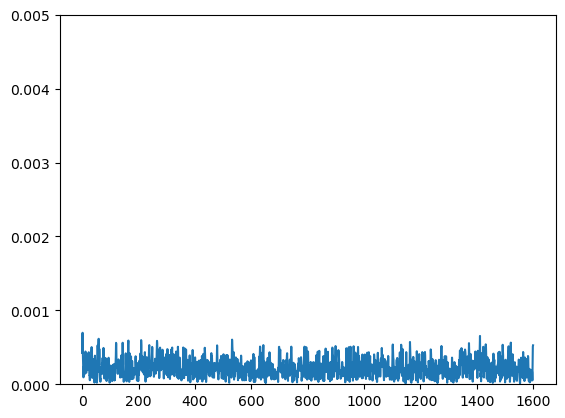

In [84]:
sns.lineplot(x=x_Xaxis, y= x_Yaxis_1704901985) 
plt.ylim(0, 0.005)

<Axes: >

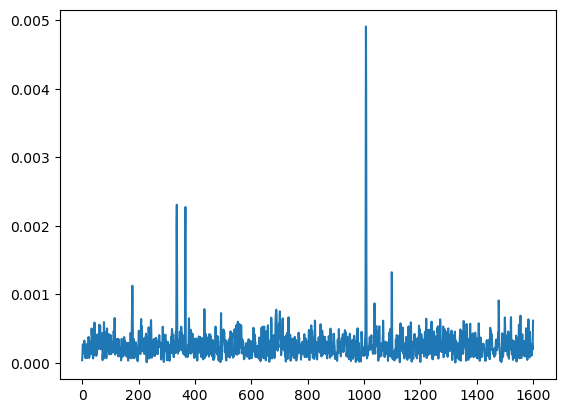

In [85]:
sns.lineplot(x=x_Xaxis, y= x_Yaxis_1704815264) 

In [188]:
len(x_Yaxis_1704815264 ), len(x_Yaxis_1704901985)

(2049, 2049)

## Excel(csv) Files from SWKim _ sigdata

In [57]:
df_normal = pd.read_csv('5528_data_looseness_normal.csv') 
df_error = pd.read_csv('5528_data_looseness_error.csv')

In [58]:
df_normal.head(15)

,asset_id,created_at,created_at_datetime,rms_x,rms_y,rms_z,rms_xyz,vel_rms_x,vel_rms_y,vel_rms_z,...,peak2peak_y,peak2peak_z,vel_peak2peak_x,vel_peak2peak_y,vel_peak2peak_z,time,imbalance_health,misalignment_health,looseness_health,bearing_health
0,55285839-9b78-48d8-9f4e-573190ace016,1704815264,2024-01-10 00:47:44,0.015930,0.017679,0.019701,0.030894,0.201879,0.303944,0.328791,...,0.123047,0.146484,1.08180,1.70089,1.78856,2024-01-11 00:00:00,1,1,1,1
1,55285839-9b78-48d8-9f4e-573190ace016,1704822473,2024-01-10 02:47:53,0.070012,0.069566,0.049347,0.110346,0.324538,0.358952,0.441110,...,0.462891,0.357422,2.08901,2.44386,2.89197,2024-01-11 00:00:00,1,1,1,1
2,55285839-9b78-48d8-9f4e-573190ace016,1704829676,2024-01-10 04:47:56,0.011621,0.014387,0.018832,0.026395,0.213049,0.229300,0.345150,...,0.093750,0.152344,1.18234,1.36917,1.72596,2024-01-11 00:00:00,1,1,1,1
3,55285839-9b78-48d8-9f4e-573190ace016,1704836885,2024-01-10 06:48:05,0.011591,0.015056,0.019152,0.026978,0.216960,0.292500,0.381362,...,0.111328,0.158203,1.31495,1.53516,2.41714,2024-01-11 00:00:00,1,1,1,1
4,55285839-9b78-48d8-9f4e-573190ace016,1704844087,2024-01-10 08:48:07,0.268893,0.226623,0.127837,0.374170,1.044890,1.030820,0.652165,...,1.669920,0.902344,6.11164,6.91443,4.14951,2024-01-11 00:00:00,1,1,1,1
5,55285839-9b78-48d8-9f4e-573190ace016,1704851296,2024-01-10 10:48:16,0.245302,0.245256,0.129588,0.370292,1.230610,1.010640,0.545437,...,2.162110,1.236330,7.97459,6.41143,3.38071,2024-01-11 00:00:00,1,1,1,1
6,55285839-9b78-48d8-9f4e-573190ace016,1704858499,2024-01-10 12:48:19,0.016124,0.018142,0.019229,0.030966,0.252864,0.308139,0.356051,...,0.123047,0.164062,1.33770,1.77110,1.91003,2024-01-11 00:00:00,1,1,1,1
7,55285839-9b78-48d8-9f4e-573190ace016,1704865708,2024-01-10 14:48:28,0.177727,0.208697,0.118564,0.298661,1.595570,1.599110,0.783298,...,1.453120,0.902344,9.64796,9.38631,4.56256,2024-01-11 00:00:00,1,1,1,1
8,55285839-9b78-48d8-9f4e-573190ace016,1704872911,2024-01-10 16:48:31,0.194262,0.218841,0.126226,0.318688,1.474350,1.511900,0.669360,...,1.382810,0.990234,7.66562,8.19292,5.01201,2024-01-11 00:00:00,1,1,1,1
9,55285839-9b78-48d8-9f4e-573190ace016,1704880123,2024-01-10 18:48:43,0.011983,0.015113,0.018998,0.027073,0.172320,0.289677,0.360909,...,0.111328,0.146484,1.10699,1.60058,2.02226,2024-01-11 00:00:00,1,1,1,1


In [59]:
print(df_normal['created_at_datetime'].dtype)
print(df_normal['time'].dtype)

object
object


In [60]:
# df_normal['created_at'] = df_normal['created_at'] + 810610
# df_normal['date'] = pd.to_datetime(df['created_at'], unit='s', utc = True)
# print(df_normal.head())
# df_normal['date'] = df_normal['date'].dt.tz_convert('Asia/Seoul')
# # df_normal['created_at_date'] = df_normal['created_at_datetime'].dt.date()

In [61]:
print(df_normal['created_at_datetime'].dtype)


object


In [62]:
df_normal.head()
# df_normal.tail()

,asset_id,created_at,created_at_datetime,rms_x,rms_y,rms_z,rms_xyz,vel_rms_x,vel_rms_y,vel_rms_z,...,peak2peak_y,peak2peak_z,vel_peak2peak_x,vel_peak2peak_y,vel_peak2peak_z,time,imbalance_health,misalignment_health,looseness_health,bearing_health
0,55285839-9b78-48d8-9f4e-573190ace016,1704815264,2024-01-10 00:47:44,0.015930,0.017679,0.019701,0.030894,0.201879,0.303944,0.328791,...,0.123047,0.146484,1.08180,1.70089,1.78856,2024-01-11 00:00:00,1,1,1,1
1,55285839-9b78-48d8-9f4e-573190ace016,1704822473,2024-01-10 02:47:53,0.070012,0.069566,0.049347,0.110346,0.324538,0.358952,0.441110,...,0.462891,0.357422,2.08901,2.44386,2.89197,2024-01-11 00:00:00,1,1,1,1
2,55285839-9b78-48d8-9f4e-573190ace016,1704829676,2024-01-10 04:47:56,0.011621,0.014387,0.018832,0.026395,0.213049,0.229300,0.345150,...,0.093750,0.152344,1.18234,1.36917,1.72596,2024-01-11 00:00:00,1,1,1,1
3,55285839-9b78-48d8-9f4e-573190ace016,1704836885,2024-01-10 06:48:05,0.011591,0.015056,0.019152,0.026978,0.216960,0.292500,0.381362,...,0.111328,0.158203,1.31495,1.53516,2.41714,2024-01-11 00:00:00,1,1,1,1
4,55285839-9b78-48d8-9f4e-573190ace016,1704844087,2024-01-10 08:48:07,0.268893,0.226623,0.127837,0.374170,1.044890,1.030820,0.652165,...,1.669920,0.902344,6.11164,6.91443,4.14951,2024-01-11 00:00:00,1,1,1,1


In [63]:
df_normal[:14]

,asset_id,created_at,created_at_datetime,rms_x,rms_y,rms_z,rms_xyz,vel_rms_x,vel_rms_y,vel_rms_z,...,peak2peak_y,peak2peak_z,vel_peak2peak_x,vel_peak2peak_y,vel_peak2peak_z,time,imbalance_health,misalignment_health,looseness_health,bearing_health
0,55285839-9b78-48d8-9f4e-573190ace016,1704815264,2024-01-10 00:47:44,0.015930,0.017679,0.019701,0.030894,0.201879,0.303944,0.328791,...,0.123047,0.146484,1.08180,1.70089,1.78856,2024-01-11 00:00:00,1,1,1,1
1,55285839-9b78-48d8-9f4e-573190ace016,1704822473,2024-01-10 02:47:53,0.070012,0.069566,0.049347,0.110346,0.324538,0.358952,0.441110,...,0.462891,0.357422,2.08901,2.44386,2.89197,2024-01-11 00:00:00,1,1,1,1
2,55285839-9b78-48d8-9f4e-573190ace016,1704829676,2024-01-10 04:47:56,0.011621,0.014387,0.018832,0.026395,0.213049,0.229300,0.345150,...,0.093750,0.152344,1.18234,1.36917,1.72596,2024-01-11 00:00:00,1,1,1,1
3,55285839-9b78-48d8-9f4e-573190ace016,1704836885,2024-01-10 06:48:05,0.011591,0.015056,0.019152,0.026978,0.216960,0.292500,0.381362,...,0.111328,0.158203,1.31495,1.53516,2.41714,2024-01-11 00:00:00,1,1,1,1
4,55285839-9b78-48d8-9f4e-573190ace016,1704844087,2024-01-10 08:48:07,0.268893,0.226623,0.127837,0.374170,1.044890,1.030820,0.652165,...,1.669920,0.902344,6.11164,6.91443,4.14951,2024-01-11 00:00:00,1,1,1,1
5,55285839-9b78-48d8-9f4e-573190ace016,1704851296,2024-01-10 10:48:16,0.245302,0.245256,0.129588,0.370292,1.230610,1.010640,0.545437,...,2.162110,1.236330,7.97459,6.41143,3.38071,2024-01-11 00:00:00,1,1,1,1
6,55285839-9b78-48d8-9f4e-573190ace016,1704858499,2024-01-10 12:48:19,0.016124,0.018142,0.019229,0.030966,0.252864,0.308139,0.356051,...,0.123047,0.164062,1.33770,1.77110,1.91003,2024-01-11 00:00:00,1,1,1,1
7,55285839-9b78-48d8-9f4e-573190ace016,1704865708,2024-01-10 14:48:28,0.177727,0.208697,0.118564,0.298661,1.595570,1.599110,0.783298,...,1.453120,0.902344,9.64796,9.38631,4.56256,2024-01-11 00:00:00,1,1,1,1
8,55285839-9b78-48d8-9f4e-573190ace016,1704872911,2024-01-10 16:48:31,0.194262,0.218841,0.126226,0.318688,1.474350,1.511900,0.669360,...,1.382810,0.990234,7.66562,8.19292,5.01201,2024-01-11 00:00:00,1,1,1,1
9,55285839-9b78-48d8-9f4e-573190ace016,1704880123,2024-01-10 18:48:43,0.011983,0.015113,0.018998,0.027073,0.172320,0.289677,0.360909,...,0.111328,0.146484,1.10699,1.60058,2.02226,2024-01-11 00:00:00,1,1,1,1


In [64]:
len(df_normal)

2312

In [65]:
df_normal['created_at_datetime'] = df_normal['created_at_datetime'].str[5:10]
df_normal['created_at_datetime']

0       01-10
1       01-10
2       01-10
3       01-10
4       01-10
        ...  
2307    08-25
2308    08-25
2309    08-25
2310    08-25
2311    08-25
Name: created_at_datetime, Length: 2312, dtype: object

In [66]:
grouped_df = df_normal.groupby('created_at_datetime').sum().reset_index()
grouped_df

,created_at_datetime,asset_id,created_at,rms_x,rms_y,rms_z,rms_xyz,vel_rms_x,vel_rms_y,vel_rms_z,...,peak2peak_y,peak2peak_z,vel_peak2peak_x,vel_peak2peak_y,vel_peak2peak_z,time,imbalance_health,misalignment_health,looseness_health,bearing_health
0,01-10,55285839-9b78-48d8-9f4e-573190ace01655285839-9...,22163146602,1.059328,1.093807,0.704466,1.695159,7.443689,7.742226,5.937580,...,8.009757,5.595703,43.458010,45.90741,36.12064,2024-01-11 00:00:002024-01-11 00:00:002024-01-...,13,13,13,13
1,01-11,55285839-9b78-48d8-9f4e-573190ace01655285839-9...,20459299413,0.978362,1.047453,0.681715,1.604780,9.988629,9.616905,6.309522,...,8.449225,5.080070,58.016380,58.01603,38.16929,2024-01-12 00:00:002024-01-12 00:00:002024-01-...,12,12,12,12
2,01-12,55285839-9b78-48d8-9f4e-573190ace01655285839-9...,20460337118,0.511374,0.550993,0.436537,0.880612,4.500839,4.310217,5.032754,...,4.294919,3.398438,28.085550,26.42795,28.93602,2024-01-13 00:00:002024-01-13 00:00:002024-01-...,12,12,12,12
3,01-14,55285839-9b78-48d8-9f4e-573190ace01655285839-9...,20462412430,0.733426,0.898619,0.614037,1.323430,6.365310,5.750824,5.410010,...,6.005861,4.417965,37.311725,34.41465,34.73730,2024-01-15 00:00:002024-01-15 00:00:002024-01-...,12,12,12,12
4,01-15,55285839-9b78-48d8-9f4e-573190ace01655285839-9...,20463450148,0.728302,0.729686,0.563861,1.192077,7.497306,6.155380,5.699152,...,6.064445,4.599605,43.369670,35.32027,34.11853,2024-01-16 00:00:002024-01-16 00:00:002024-01-...,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,08-21,55285839-9b78-48d8-9f4e-573190ace01655285839-9...,20690543249,0.719545,1.099871,0.678355,1.489561,4.622338,4.295535,5.886304,...,7.740233,4.833984,29.122520,27.16063,35.23807,2024-08-22 00:00:002024-08-22 00:00:002024-08-...,12,12,12,12
189,08-22,55285839-9b78-48d8-9f4e-573190ace01655285839-9...,20691580865,0.715628,1.210554,0.646181,1.549432,4.728378,4.528322,5.611858,...,7.851561,4.699218,30.526630,30.84505,34.62475,2024-08-23 00:00:002024-08-23 00:00:002024-08-...,12,12,12,12
190,08-23,55285839-9b78-48d8-9f4e-573190ace01655285839-9...,20692618479,0.383431,0.533041,0.397458,0.778216,3.916299,3.764365,5.194589,...,3.328129,2.935547,23.775560,22.99607,30.56061,2024-08-24 00:00:002024-08-24 00:00:002024-08-...,12,12,12,12
191,08-24,55285839-9b78-48d8-9f4e-573190ace01655285839-9...,20693656098,0.371671,0.561410,0.396056,0.792643,3.920331,4.073258,4.797196,...,3.410158,2.736326,24.487890,25.07795,28.08409,2024-08-25 00:00:002024-08-25 00:00:002024-08-...,12,12,12,12


In [48]:
not_twelve_set = grouped_df[grouped_df['bearing_health'] != 12]
not_twelve_set

,created_at_datetime,asset_id,created_at,rms_x,rms_y,rms_z,rms_xyz,vel_rms_x,vel_rms_y,vel_rms_z,...,peak2peak_y,peak2peak_z,vel_peak2peak_x,vel_peak2peak_y,vel_peak2peak_z,time,imbalance_health,misalignment_health,looseness_health,bearing_health
0,01-10,55285839-9b78-48d8-9f4e-573190ace01655285839-9...,22163146602,1.059328,1.093807,0.704466,1.695159,7.443689,7.742226,5.937580,...,8.009757,5.595703,43.458010,45.90741,36.12064,2024-01-11 00:00:002024-01-11 00:00:002024-01-...,13,13,13,13
13,01-28,55285839-9b78-48d8-9f4e-573190ace01655285839-9...,22183357280,0.495368,0.565836,0.460828,0.892135,4.026261,4.302920,5.250925,...,4.253910,3.357421,24.620420,26.81226,31.29531,2024-01-29 00:00:002024-01-29 00:00:002024-01-...,13,13,13,13
18,02-03,55285839-9b78-48d8-9f4e-573190ace01655285839-9...,15362308841,0.912167,1.071031,0.659384,1.563934,6.252506,5.788234,4.531471,...,8.156255,5.085940,38.888310,35.51568,28.68404,2024-02-04 00:00:002024-02-04 00:00:002024-02-...,9,9,9,9
19,02-04,55285839-9b78-48d8-9f4e-573190ace01655285839-9...,18777215399,0.873079,0.950951,0.664276,1.458734,6.202939,5.729022,5.036001,...,6.568361,4.464841,39.249790,36.39608,32.09356,2024-02-05 00:00:002024-02-05 00:00:002024-02-...,11,11,11,11
24,02-14,55285839-9b78-48d8-9f4e-573190ace01655285839-9...,22202457206,1.025001,1.149077,0.783151,1.742976,8.305354,6.419103,6.292224,...,8.742184,5.537104,51.699150,41.76816,39.01200,2024-02-15 00:00:002024-02-15 00:00:002024-02-...,13,13,13,13
36,02-26,55285839-9b78-48d8-9f4e-573190ace01655285839-9...,18798144666,0.334656,0.409322,0.311017,0.626618,3.886148,5.133690,4.395671,...,2.712889,2.226563,22.823020,30.65103,25.03220,2024-02-27 00:00:002024-02-27 00:00:002024-02-...,11,11,11,11
37,02-27,55285839-9b78-48d8-9f4e-573190ace01655285839-9...,18799031106,0.774177,0.885647,0.574858,1.323059,7.341030,7.800852,5.016250,...,6.398444,4.429685,47.147210,46.32780,29.94716,2024-02-28 00:00:002024-02-28 00:00:002024-02-...,11,11,11,11
38,02-28,55285839-9b78-48d8-9f4e-573190ace01655285839-9...,18799982348,0.165455,0.207473,0.226317,0.350551,2.594605,3.173058,3.951633,...,1.658204,1.757811,14.943310,19.42764,22.23885,2024-02-29 00:00:002024-02-29 00:00:002024-02-...,11,11,11,11
45,03-06,55285839-9b78-48d8-9f4e-573190ace01655285839-9...,22225960908,0.451777,0.555824,0.429190,0.844201,4.184212,4.416590,5.331587,...,3.761718,3.246093,24.916430,26.38207,32.23942,2024-03-07 00:00:002024-03-07 00:00:002024-03-...,13,13,13,13
51,03-14,55285839-9b78-48d8-9f4e-573190ace01655285839-9...,18814205247,0.880665,0.977126,0.694955,1.499670,6.038331,5.957494,5.013640,...,7.998043,5.619141,37.288680,38.64434,32.33524,2024-03-15 00:00:002024-03-15 00:00:002024-03-...,11,11,11,11


In [71]:
not_twelve_set_date = not_twelve_set['created_at_datetime'].values

In [72]:
type(not_twelve_set_date)
print(not_twelve_set_date)

['01-10' '01-28' '02-03' '02-04' '02-14' '02-26' '02-27' '02-28' '03-06'
 '03-14' '05-28' '05-29' '06-04' '06-25']


In [74]:
refined_df = df_normal[~df_normal['created_at_datetime'].isin(not_twelve_set_date)]

In [75]:
refined_df

,asset_id,created_at,created_at_datetime,rms_x,rms_y,rms_z,rms_xyz,vel_rms_x,vel_rms_y,vel_rms_z,...,peak2peak_y,peak2peak_z,vel_peak2peak_x,vel_peak2peak_y,vel_peak2peak_z,time,imbalance_health,misalignment_health,looseness_health,bearing_health
13,55285839-9b78-48d8-9f4e-573190ace016,1704901985,01-11,0.011606,0.014731,0.018713,0.026493,0.228996,0.289439,0.355050,...,0.117188,0.134766,1.52334,1.58771,2.13577,2024-01-12 00:00:00,1,1,1,1
14,55285839-9b78-48d8-9f4e-573190ace016,1704909194,01-11,0.011671,0.014640,0.018850,0.026568,0.238793,0.292675,0.348184,...,0.099609,0.146484,1.32786,1.48921,2.41545,2024-01-12 00:00:00,1,1,1,1
15,55285839-9b78-48d8-9f4e-573190ace016,1704916397,01-11,0.011427,0.014757,0.019353,0.026886,0.212135,0.287354,0.488980,...,0.099609,0.140625,1.21189,1.58043,2.73588,2024-01-12 00:00:00,1,1,1,1
16,55285839-9b78-48d8-9f4e-573190ace016,1704923605,01-11,0.011313,0.014774,0.019017,0.026607,0.199989,0.275829,0.311137,...,0.117188,0.146484,1.30704,1.62107,1.77438,2024-01-12 00:00:00,1,1,1,1
17,55285839-9b78-48d8-9f4e-573190ace016,1704930808,01-11,0.190492,0.258121,0.145155,0.352113,2.543250,3.440420,0.895429,...,1.792970,1.007810,14.38000,20.13260,5.17208,2024-01-12 00:00:00,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,55285839-9b78-48d8-9f4e-573190ace016,1724568616,08-25,0.015997,0.015462,0.020731,0.030410,0.250990,0.291288,0.542528,...,0.099609,0.164062,1.46049,1.56692,2.90621,2024-08-26 00:00:00,1,1,1,1
2308,55285839-9b78-48d8-9f4e-573190ace016,1724575824,08-25,0.014252,0.015412,0.020709,0.029488,0.237465,0.281824,0.415895,...,0.105469,0.152344,1.47539,1.77482,2.47391,2024-08-26 00:00:00,1,1,1,1
2309,55285839-9b78-48d8-9f4e-573190ace016,1724583026,08-25,0.014229,0.015372,0.020380,0.029226,0.265960,0.204734,0.313585,...,0.117188,0.169922,1.36475,1.27366,1.98877,2024-08-26 00:00:00,1,1,1,1
2310,55285839-9b78-48d8-9f4e-573190ace016,1724590235,08-25,0.022694,0.028622,0.022097,0.042690,0.288982,0.244747,0.327448,...,0.175781,0.169922,1.84697,1.52400,1.85696,2024-08-26 00:00:00,1,1,1,1


## Spectrum Data 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt


In [2]:
df = pd.read_csv('wave_5528') 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   asset_id         2862 non-null   object
 1   created_at       2862 non-null   int64 
 2   waveform_x       2862 non-null   object
 3   waveform_y       2862 non-null   object
 4   waveform_z       2862 non-null   object
 5   spectrum_x_amp   2862 non-null   object
 6   spectrum_x_freq  2862 non-null   object
 7   spectrum_y_amp   2862 non-null   object
 8   spectrum_y_freq  2862 non-null   object
 9   spectrum_z_amp   2862 non-null   object
 10  spectrum_z_freq  2862 non-null   object
dtypes: int64(1), object(10)
memory usage: 246.1+ KB


In [4]:
df = df.drop(columns = ['waveform_x', 'waveform_y', 'waveform_z'])

In [5]:
df.head()

,asset_id,created_at,spectrum_x_amp,spectrum_x_freq,spectrum_y_amp,spectrum_y_freq,spectrum_z_amp,spectrum_z_freq
0,55285839-9b78-48d8-9f4e-573190ace016,1704037054,"0.00013562335236381318,0.00026238675317164043,...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.00015813022176129024,0.00026261764994749197,...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.000021972554107421716,0.00011090951632296663...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,..."
1,55285839-9b78-48d8-9f4e-573190ace016,1704044261,"0.00001215773431929381,0.00015234156441725882,...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.00023089524007559786,0.0002452989878206022,0...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.00023357429763421056,0.00032572102254729564,...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,..."
2,55285839-9b78-48d8-9f4e-573190ace016,1704051464,"0.00007455855756296849,0.0001040666309671526,0...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.00008427747677054837,0.00024831479057499476,...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.0002645021019863118,0.0003693810393027081,0....","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,..."
3,55285839-9b78-48d8-9f4e-573190ace016,1704058671,"0.0002178848007905891,0.0003843609287728524,0....","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.0000586359092457155,0.00027798757144449106,0...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.000050641510550612616,0.00012616639331426807...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,..."
4,55285839-9b78-48d8-9f4e-573190ace016,1704065874,"0.00042844956204061383,0.0004916728325574005,0...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.0003007782108584857,0.0006374620290661493,0....","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.0000843486583179423,0.0003417223967207743,0....","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,..."


In [10]:
df['date'] = pd.to_datetime(df['created_at'], unit='s').dt.date

In [14]:
grouped_date = df.groupby('date')['value'].sum().reset_index()

KeyError: 'Column not found: value'

,spectrum_x_amp,spectrum_x_freq,spectrum_y_amp,spectrum_y_freq,spectrum_z_amp,spectrum_z_freq
0,"0.00013562335236381318,0.00026238675317164043,...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.00015813022176129024,0.00026261764994749197,...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.000021972554107421716,0.00011090951632296663...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,..."
1,"0.00001215773431929381,0.00015234156441725882,...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.00023089524007559786,0.0002452989878206022,0...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.00023357429763421056,0.00032572102254729564,...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,..."
2,"0.00007455855756296849,0.0001040666309671526,0...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.00008427747677054837,0.00024831479057499476,...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.0002645021019863118,0.0003693810393027081,0....","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,..."
3,"0.0002178848007905891,0.0003843609287728524,0....","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.0000586359092457155,0.00027798757144449106,0...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.000050641510550612616,0.00012616639331426807...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,..."
4,"0.00042844956204061383,0.0004916728325574005,0...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.0003007782108584857,0.0006374620290661493,0....","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.0000843486583179423,0.0003417223967207743,0....","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,..."
...,...,...,...,...,...,...
2857,"0.00003956027685333145,0.00008012893175462952,...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.00010330742283204408,0.00031948714029055264,...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.0005441195116748482,0.0005433656362493335,0....","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,..."
2858,"0.00025657688195473315,0.00013894313045157954,...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.0002615483248429337,0.0006756169554322338,0....","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.0001714884837745928,0.00047148795459486684,0...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,..."
2859,"0.000022036931763752753,0.0002845732928706351,...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.0008307563603063882,0.0012683961226302276,0....","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.0003252644391281576,0.0005032399646778357,0....","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,..."
2860,"0.00008641925679665007,0.00019611299392468677,...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.00015287401246730204,0.0002748856199664695,0...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,...","0.00028969819491704145,0.00047120727471945266,...","0,0.78125,1.5625,2.34375,3.125,3.90625,4.6875,..."


In [13]:
x_amp_float = [float(x) for x in x_amp[0].split(',')]
x_amp_float

[0.00013562335236381318,
 0.00026238675317164043,
 0.00042559260567147866,
 0.0003920291530680798,
 0.0002376098266229576,
 0.00036101521848735295,
 0.00038144663926032677,
 0.00014776250993504906,
 0.00019658205754358873,
 0.00029039973049600304,
 0.00026199065349290934,
 0.00022468639702535268,
 0.00017922962402140084,
 9.484817088865916e-05,
 9.559965511068374e-05,
 0.00017359296101581809,
 0.0001906463695348671,
 0.00022446764474353545,
 0.00027631564889089936,
 0.0003282368396811095,
 0.00030121867306811547,
 0.00016365991676342556,
 9.636247910631692e-06,
 6.126547349268117e-05,
 8.682229936227214e-05,
 0.0002616456366720129,
 0.0003183770022125909,
 0.0002740242859367164,
 0.0002297092150461201,
 0.00022678555902759683,
 0.00017226748316437083,
 5.8802377170277334e-05,
 0.00013277110150396927,
 3.0348493272725385e-05,
 8.686218821581129e-05,
 7.933575776282385e-05,
 0.00016430969063858312,
 0.0004328224938531719,
 0.0004978046671848265,
 0.00038163173397674067,
 0.00032413544889

In [16]:
x_freq_float = [float(x) for x in x_freq[0].split(',')]
x_freq_float

[0.0]